Directory Management

In [27]:
import os
# Creating directories, if they do not exist
os.makedirs("plots", exist_ok=True)
os.makedirs("metrics", exist_ok=True)
os.makedirs("models", exist_ok=True)
os.makedirs("preprocessed_data", exist_ok=True)

Import Necessary Libraries

In [63]:
# Importing necessary libraries
# Core Libraries
import pandas as pd  # For data manipulation
import numpy as np  # For numerical operations

# Visualization Libraries
import matplotlib.pyplot as plt  # For plotting
import seaborn as sns  # For advanced visualizations

# Statistical Analysis
import scipy.stats as stats  # For statistical tests and distributions

# Model Selection and Evaluation
from sklearn.model_selection import (
    train_test_split,  # Splitting data into training and testing sets
    GridSearchCV,  # Exhaustive search over hyperparameters
    RandomizedSearchCV,  # Randomized search over hyperparameters
    cross_val_score,  # Evaluate a model using cross-validation
    cross_validate,  # More comprehensive cross-validation
    learning_curve,  # Learning curve visualization
    validation_curve  # Validation curve visualization
)

# Preprocessing
from sklearn.preprocessing import (
    StandardScaler,  # Standardize features
    LabelEncoder,  # Encode labels with value between 0 and n_classes-1
    OneHotEncoder,  # Convert categorical features to one-hot encoding
    PowerTransformer # For transformations that work on all values, including negatives.
)
from sklearn.impute import SimpleImputer, KNNImputer  # Handle missing values

# Pipelines
from sklearn.pipeline import Pipeline  # To streamline preprocessing and modeling steps

# Classification Models
from sklearn.linear_model import LogisticRegression  # Logistic Regression
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text  # Decision Tree
from sklearn.ensemble import RandomForestClassifier, VotingClassifier  # Random Forest, Voting Classifier
from xgboost import XGBClassifier # XGBoost Classifier

# Metrics for Evaluation
from sklearn.metrics import (
    accuracy_score,  # Corrected: Accuracy score
    classification_report,  # Summary of precision, recall, and F1-score
    confusion_matrix,  # Confusion matrix
    f1_score,  # F1-score for model evaluation
    roc_curve,  # Receiver Operating Characteristic curve
    roc_auc_score,  # Area under the ROC curve
    auc,  # Area under the curve
    precision_recall_curve,  # Precision-recall curve
    average_precision_score  # Average precision score
)

# Handling Imbalanced Data
from imblearn.over_sampling import SMOTE  # Synthetic Minority Oversampling
from imblearn.under_sampling import RandomUnderSampler  # Random undersampling
from imblearn.pipeline import Pipeline  # Pipeline supporting imbalanced datasets

# Warnings
import warnings  # Suppress warnings during exploratory analysis
warnings.filterwarnings('ignore')

# Time Handling
import datetime  # For working with datetime objects

import os
import json
import joblib
import inspect
import pickle
from collections import Counter

pd.set_option('display.max_columns', None) # For displaying all columns in the dataframe

 Load and Explore Data

In [29]:
# Mounting  Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [30]:
# File path to dataset
file_path = '/content/drive/MyDrive/Project AnomaData/AnomaData.xlsx'

In [31]:
# Reading the dataset (Excel file)
df = pd.read_excel(file_path)

In [32]:
# Preview of the first few rows
print("Data Sample:")
df.head()

Data Sample:


,time,y,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30,x31,x32,x33,x34,x35,x36,x37,x38,x39,x40,x41,x42,x43,x44,x45,x46,x47,x48,x49,x50,x51,x52,x54,x55,x56,x57,x58,x59,x60,y.1
0,1999-05-01 00:00:00,0,0.376665,-4.596435,-4.095756,13.497687,-0.118830,-20.669883,0.000732,-0.061114,-0.059966,-0.038189,0.877951,-0.052959,-13.306135,0.101068,0.041800,0.199901,-2.327329,-0.944167,3.075199,0.123154,-0.104334,-0.570710,-9.784456,0.355960,15.842819,-0.451973,-0.105282,96,-134.27786,0.058726,-0.021645,9.366755,0.002151,-69.187583,4.232571,-0.225267,-0.196872,-0.072449,-0.103732,-0.720746,-5.412436,76.679042,-0.632727,1351.63286,-0.657096,-0.434947,-108.77597,0.084856,10.210182,11.295155,29.984624,10.091721,-4.936434,-24.590146,18.515436,3.473400,0.033444,0.953219,0.006076,0
1,1999-05-01 00:02:00,0,0.475720,-4.542502,-4.018359,16.230659,-0.128733,-18.758079,0.000732,-0.061114,-0.059966,-0.038189,0.873273,-0.014244,-13.306135,0.101108,0.041447,0.304313,-2.340627,-0.939994,3.075199,0.123154,-0.104334,-0.574861,-9.784456,0.360160,16.491684,-0.450450,-0.092430,96,-134.48019,0.058759,-0.004579,9.350215,0.002149,-68.585197,4.311490,-0.225267,-0.196872,-0.059103,-0.083895,-0.720746,-8.343222,78.181598,-0.632727,1370.37895,-0.875629,-1.125819,-108.84897,0.085146,12.534340,11.290761,29.984624,10.095871,-4.937179,-32.413266,22.760065,2.682933,0.033536,1.090502,0.006083,0
2,1999-05-01 00:04:00,0,0.363848,-4.681394,-4.353147,14.127997,-0.138636,-17.836632,0.010803,-0.061114,-0.030057,-0.018352,1.004910,0.065150,-9.619596,0.101148,0.041095,0.252839,-2.353925,-0.935824,3.075199,0.123154,-0.104334,-0.579013,-9.784456,0.364356,15.972885,-0.448927,-0.097144,96,-133.94659,0.058791,-0.084658,9.037409,0.002148,-67.838187,4.809914,-0.225267,-0.186801,-0.048696,-0.073823,-0.720746,-1.085166,79.684154,-0.632727,1368.12309,-0.037775,-0.519541,-109.08658,0.085436,18.582893,11.286366,29.984624,10.100265,-4.937924,-34.183774,27.004663,3.537487,0.033629,1.840540,0.006090,0
3,1999-05-01 00:06:00,0,0.301590,-4.758934,-4.023612,13.161566,-0.148142,-18.517601,0.002075,-0.061114,-0.019986,-0.008280,0.930037,-0.067199,-15.196531,0.101188,0.040742,0.072873,-2.367223,-0.931651,3.075199,0.123154,-0.104334,-0.583165,-9.784456,0.368556,15.608688,-0.447404,-0.160073,96,-134.00259,0.058824,-0.055118,9.020625,0.002146,-67.091148,5.308343,-0.225267,-0.186801,-0.047017,-0.063752,-0.720746,6.172891,81.186702,-0.632727,1365.69145,-0.987410,0.674524,-109.56277,0.085726,17.719032,11.281972,29.984624,10.104660,-4.938669,-35.954281,21.672449,3.986095,0.033721,2.554880,0.006097,0
4,1999-05-01 00:08:00,0,0.265578,-4.749928,-4.333150,15.267340,-0.155314,-17.505913,0.000732,-0.061114,-0.030057,-0.008280,0.828410,-0.018472,-14.609266,0.101229,0.040390,0.171033,-2.380521,-0.927478,3.075199,0.123154,-0.104334,-0.587316,-9.784456,0.372756,15.606125,-0.445879,-0.131630,96,-133.14571,0.058856,-0.153851,9.344233,0.002145,-65.991813,5.806771,-0.225267,-0.186801,-0.057088,-0.063752,-0.720746,-3.379599,82.689258,-0.632727,1363.25786,-0.238445,-0.063044,-110.03891,0.086016,16.855202,11.277577,29.984624,10.109054,-4.939414,-37.724789,21.907251,3.601573,0.033777,1.410494,0.006105,0


In [33]:
# Making a deep copy of the data in case we need the original data
df_deep = df.copy()

# Confirming the copy has been made successfully
print("Original Data ID:", id(df))
print("Copied Data ID:", id(df_deep))

# The IDs are different, indicating a deep copy was created.

Original Data ID: 137779933823712
Copied Data ID: 137779956202944


In [34]:
# Checking the column names in the dataset
df.columns

Index(['time', 'y', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9',
       'x10', 'x11', 'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18', 'x19',
       'x20', 'x21', 'x22', 'x23', 'x24', 'x25', 'x26', 'x27', 'x28', 'x29',
       'x30', 'x31', 'x32', 'x33', 'x34', 'x35', 'x36', 'x37', 'x38', 'x39',
       'x40', 'x41', 'x42', 'x43', 'x44', 'x45', 'x46', 'x47', 'x48', 'x49',
       'x50', 'x51', 'x52', 'x54', 'x55', 'x56', 'x57', 'x58', 'x59', 'x60',
       'y.1'],
      dtype='object')

In [35]:
print("Target column 'y' - unique values and data type:")
print(df['y'].unique())
print(df['y'].dtype)

Target column 'y' - unique values and data type:
[0 1]
int64


In [36]:
df['y'] = df['y'].astype('category')

In [37]:
# Checking and handling missing values
missing_values = df.isnull().sum()
print("\n\nMissing Values Summary::\n", missing_values)
print("\nColumns Containing Missing Values:")
print(missing_values[missing_values > 0])  # Displaying only columns with missing values, if exists

# No missing values observed; imputation is not needed in this case.
# If missing values are found in other datasets, the imputation logic in the preprocessing function will handle them.



Missing Values Summary::
 time    0
y       0
x1      0
x2      0
x3      0
       ..
x57     0
x58     0
x59     0
x60     0
y.1     0
Length: 62, dtype: int64

Columns Containing Missing Values:
Series([], dtype: int64)


In [38]:
# Checking for duplicate rows and drop them
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}\n")

# No duplicate rows observed; dropping rows is not needed in this case.
# If duplicate rows are found in other datasets, the preprocessing function will handle them.

Number of duplicate rows: 0



Dropping Redundant Columns

In [39]:
# Dropping 'y.1' after analyzing discrepancies with 'y'
if 'y.1' in df.columns:
    df.drop(columns=['y.1'], inplace=True)
    print("Dropped column 'y.1'.")

"""# Dropping 'time' (included in the preprocessing function.)
if 'time' in df.columns:
    df.drop(columns=['time'], inplace=True)
    print("Dropped 'time' column after feature extraction.")"""

# Confirming that 'y.1' has been dropped
print("Columns after dropping 'y.1':")
print(df.columns)

Dropped column 'y.1'.
Columns after dropping 'y.1':
Index(['time', 'y', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9',
       'x10', 'x11', 'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18', 'x19',
       'x20', 'x21', 'x22', 'x23', 'x24', 'x25', 'x26', 'x27', 'x28', 'x29',
       'x30', 'x31', 'x32', 'x33', 'x34', 'x35', 'x36', 'x37', 'x38', 'x39',
       'x40', 'x41', 'x42', 'x43', 'x44', 'x45', 'x46', 'x47', 'x48', 'x49',
       'x50', 'x51', 'x52', 'x54', 'x55', 'x56', 'x57', 'x58', 'x59', 'x60'],
      dtype='object')


Preprocessing Pipeline - Function for Preprocessing

This ensures:

- A comprehensive and reusable function for various preprocessing tasks.
- Logical order of steps: duplicates → missing values → skewness → cardinality → outliers → scaling → SMOTE.

In [40]:
def preprocess_data(
    df, target, test_size=0.2, scaling=True, smote=True, handle_outliers=True,
    handle_skewness=True, handle_duplicates=True, handle_cardinality=True, random_state=42
):
    """
    Comprehensive preprocessing function

    Preprocess the dataset:
    1. Remove datetime columns
    2. Handle duplicates
    3. Handle missing values
    4. Handle skewed data
    5. Handle outliers
    6. Handle high cardinality
    7. Encode categorical features
    8. Scale numerical features
    9. Address class imbalance using SMOTE
    10. Split into train-test sets

    Args:
        df (pd.DataFrame): Input dataset
        target (str): Target column
        test_size (float): Proportion for test set
        scaling (bool): Whether to scale numerical features
        smote (bool): Whether to apply SMOTE
        handle_outliers (bool): Whether to apply outlier capping
        random_state (int): Random seed

    Returns:
        X_train, X_test, y_train, y_test: Processed train-test splits

    """

    # Ensure datetime columns are recognized and removed
    datetime_cols = df.select_dtypes(include=["object"]).apply(pd.to_datetime, errors='ignore').select_dtypes(include=["datetime64"]).columns
    df[datetime_cols] = df[datetime_cols].apply(pd.to_datetime, errors='coerce')
    df = df.select_dtypes(exclude=["datetime64"])
    print(f"Removed datetime features: {datetime_cols.tolist()}\n")

    # Handle duplicates
    if handle_duplicates:
        duplicate_count = df.duplicated().sum()
        if duplicate_count > 0:
            df = df.drop_duplicates()
            print(f"Removed {duplicate_count} duplicate rows.\n")
        else:
            print("No duplicate rows found.\n")

    # Handle missing values
    imputer = SimpleImputer(strategy="mean")
    df.loc[:, df.select_dtypes(include=["float64", "int64"]).columns] = imputer.fit_transform(
        df.select_dtypes(include=["float64", "int64"])
    )

    # Handle skewed features
    if handle_skewness:
        skewed_features = df.select_dtypes(include=["float64", "int64"]).apply(lambda x: x.skew())
        skewed_features = skewed_features[abs(skewed_features) > 0.75].index
        transformer = PowerTransformer(method="yeo-johnson")
        df[skewed_features] = transformer.fit_transform(df[skewed_features])
        print(f"Applied skewness correction to {len(skewed_features)} features.\n")

    # Handle high cardinality
    if handle_cardinality:
        categorical_cols = df.select_dtypes(include=["object", "category"]).columns
        for col in categorical_cols:
            cardinality = df[col].nunique() / len(df)
            if cardinality > 0.3:
                df.drop(columns=[col], inplace=True)
                print(f"Dropped high-cardinality column: {col}.\n")

    # Segregate features and target
    X = df.drop(columns=[target])  # Ensures y is not part of X
    y = df[target]  # Extracts y separately

    # Encode categorical features
    encoder = OneHotEncoder(sparse_output=False, drop="first")
    categorical_cols = X.select_dtypes(include=["object", "category"]).columns
    if not categorical_cols.empty:
        encoded_data = encoder.fit_transform(X[categorical_cols])
        encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical_cols))
        X = pd.concat([X.drop(columns=categorical_cols), encoded_df], axis=1)

    # Handle outliers
    if handle_outliers:
        for col in X.select_dtypes(include=["float64", "int64"]).columns:
            Q1, Q3 = X[col].quantile([0.25, 0.75])
            IQR = Q3 - Q1
            upper_limit = Q3 + 3 * IQR
            lower_limit = Q1 - 3 * IQR
            X[col] = np.clip(X[col], lower_limit, upper_limit)
    print("Outliers handled using IQR Capping method.\n")

    # Scale the data
    if scaling:
        scaler = StandardScaler()
        X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, stratify=y, random_state=random_state
    )

    # Apply SMOTE
    if smote:
        sm = SMOTE(random_state=random_state)
        X_train, y_train = sm.fit_resample(X_train, y_train)

    return X_train, X_test, y_train, y_test

In [41]:
# Saving Preprocessing Function
with open("preprocess_data.py", "w") as f:
    f.write(inspect.getsource(preprocess_data))
print("Preprocessing function saved to preprocess_data.py")

Preprocessing function saved to preprocess_data.py


In [42]:
# Testing the function
X_train, X_test, y_train, y_test = preprocess_data(df, target='y')
print("Preprocessing completed. Features after preprocessing:\n")

# Confirming class distribution after SMOTE
unique, counts = np.unique(y_train, return_counts=True)
print(f"Class distribution in training data after SMOTE: {dict(zip(unique, counts))}\n")


unique, counts = np.unique(y_test, return_counts=True)
print(f"Class distribution in test data after SMOTE: {dict(zip(unique, counts))}\n")

# Checking columns in train and test sets
print(X_train.columns, '\n', X_test.columns)

Removed datetime features: []

No duplicate rows found.

Applied skewness correction to 36 features.

Outliers handled using IQR Capping method.

Preprocessing completed. Features after preprocessing:

Class distribution in training data after SMOTE: {0: 14619, 1: 14619}

Class distribution in test data after SMOTE: {0: 3655, 1: 25}

Index(['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11',
       'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18', 'x19', 'x20', 'x21',
       'x22', 'x23', 'x24', 'x25', 'x26', 'x27', 'x28', 'x29', 'x30', 'x31',
       'x32', 'x33', 'x34', 'x35', 'x36', 'x37', 'x38', 'x39', 'x40', 'x41',
       'x42', 'x43', 'x44', 'x45', 'x46', 'x47', 'x48', 'x49', 'x50', 'x51',
       'x52', 'x54', 'x55', 'x56', 'x57', 'x58', 'x59', 'x60'],
      dtype='object') 
 Index(['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11',
       'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18', 'x19', 'x20', 'x21',
       'x22', 'x23', 'x24', 'x25', 'x26',

In [43]:
# Create directory if it doesn't exist
os.makedirs("preprocessed_data", exist_ok=True)

# Saving preprocessed train-test data
np.save("X_train.npy", X_train)
np.save("X_test.npy", X_test)
np.save("y_train.npy", y_train)
np.save("y_test.npy", y_test)
print("Preprocessed data saved.")

Preprocessed data saved.


Modeling and Evaluation - Function for Model Training and Evaluation

In [69]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix
from sklearn.tree import plot_tree, export_text
from sklearn.model_selection import learning_curve

def train_and_evaluate_model(model, X_train, X_test, y_train, y_test, plot_learning_curve=False, model_name="Model"):
    """
    Train a model, evaluate its performance, and visualize results.

    Args:
        model: Scikit-learn compatible model to train.
        X_train, X_test, y_train, y_test: Training and testing datasets.
        plot_learning_curve (bool): Whether to plot the learning curve.
        model_name (str): Name of the model for visualization.

    Returns:
        metrics (dict): Dictionary of evaluation metrics.
    """

    # Training the Model
    model.fit(X_train, y_train)

    # Predictions
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, 'predict_proba') else None

    # Evaluation Metrics
    metrics = {
        "accuracy": accuracy_score(y_test, y_pred),
        "precision": precision_score(y_test, y_pred, zero_division=1),
        "recall": recall_score(y_test, y_pred),
        "f1_score": f1_score(y_test, y_pred),
        "roc_auc": roc_auc_score(y_test, y_prob) if y_prob is not None else None
    }

    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    print("\nConfusion Matrix:")
    conf_matrix = confusion_matrix(y_test, y_pred)
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title(f"Confusion Matrix: {model_name}")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()
    # Saving Confusion Matrix
    plt.savefig(f"plots/confusion_matrix_{model_name.lower()}.png", bbox_inches="tight")
    print(f"Confusion matrix saved for {model_name}.")
    plt.show()

    # ROC Curve
    if y_prob is not None:
      fpr, tpr, _ = roc_curve(y_test, y_prob)
      plt.plot(fpr, tpr, label=f"AUC = {metrics['roc_auc']:.2f}")
      plt.plot([0, 1], [0, 1], linestyle="--", color="red")
      plt.xlabel("False Positive Rate")
      plt.ylabel("True Positive Rate")
      plt.title(f"ROC Curve: {model_name}")
      plt.legend(loc="lower right")
      plt.grid()
      plt.savefig(f"plots/roc_curve_{model_name.lower()}.png", bbox_inches="tight")
      print(f"ROC curve saved for {model_name}.")
      plt.show()


    # Learning Curve
    if plot_learning_curve:
        train_sizes, train_scores, test_scores = learning_curve(
            model, X_train, y_train, cv=5, scoring="f1", train_sizes=np.linspace(0.1, 1.0, 10)
        )

        train_mean = np.mean(train_scores, axis=1)
        train_std = np.std(train_scores, axis=1)
        test_mean = np.mean(test_scores, axis=1)
        test_std = np.std(test_scores, axis=1)

        plt.figure(figsize=(10, 6))
        plt.plot(train_sizes, train_mean, label="Training Score", color="blue")
        plt.plot(train_sizes, test_mean, label="Cross-Validation Score", color="green")
        plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="blue", alpha=0.2)
        plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="green", alpha=0.2)
        plt.title(f"Learning Curve: {model_name}")
        plt.xlabel("Training Set Size")
        plt.ylabel("F1 Score")
        plt.legend(loc="best")
        plt.grid()
        plt.savefig(f"plots/learning_curve_{model_name.lower()}.png", bbox_inches="tight")
        print(f"Learning curve saved for {model_name}.")
        plt.show()

    # Plotting Decision Tree (for DecisionTreeClassifier or RandomForestClassifier)
    if isinstance(model, DecisionTreeClassifier):
        plt.figure(figsize=(20, 10))
        plot_tree(model, filled=True, feature_names=X_train.columns, class_names=["0", "1"])
        plt.title(f"Decision Tree Visualization: {model_name}")
        # Saving the Decision Tree Plot
        plt.savefig(f"plots/decision_tree_{model_name.lower()}.png", bbox_inches="tight")
        print(f"Decision tree plot saved for {model_name}.")
        plt.show()

        # Displaying textual representation
        print("\nText Representation of Decision Tree:")
        print(export_text(model, feature_names=list(X_train.columns)))

    elif isinstance(model, RandomForestClassifier):
        # Select a random or the first tree in the forest for visualization
        best_tree = model.estimators_[0]  # Picking the first tree
        plt.figure(figsize=(20, 10))
        plot_tree(best_tree, filled=True, feature_names=X_train.columns, class_names=["0", "1"])
        plt.title(f"Random Forest - Decision Tree Visualization: {model_name}")
        # Saving the Decision Tree Plot
        plt.savefig(f"plots/random_forest_tree_{model_name.lower()}.png", bbox_inches="tight")
        print(f"Random Forest Decision tree plot saved for {model_name}.")
        plt.show()

        # Displaying textual representation of the best tree
        print("\nText Representation of a Decision Tree in Random Forest:")
        print(export_text(best_tree, feature_names=list(X_train.columns)))

    return metrics

In [45]:
# Save Train and Evaluate Function
with open("train_and_evaluate_model.py", "w") as f:
    f.write(inspect.getsource(train_and_evaluate_model))
print("Train and Evaluate function saved to train_and_evaluate_model.py")

Train and Evaluate function saved to train_and_evaluate_model.py


Hyperparameter Tuning - Function for Tuning

In [46]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

def hyperparameter_tuning(model, param_grid, X_train, y_train, scoring='f1', cv=5, search_type='grid', n_iter=10):
    """
    Perform hyperparameter tuning using GridSearchCV or RandomizedSearchCV.

    Args:
        model: The model to be tuned (e.g., RandomForestClassifier).
        param_grid (dict): Parameter grid for tuning.
        X_train: Training features.
        y_train: Training target.
        scoring (str): Scoring metric for optimization (default: 'f1').
        cv (int): Number of cross-validation folds (default: 5).
        search_type (str): Type of search ('grid' for GridSearchCV, 'random' for RandomizedSearchCV).
        n_iter (int): Number of parameter settings sampled for RandomizedSearchCV (default: 10).

    Returns:
        best_model: Model with the best hyperparameters.
        best_params: Dictionary of the best hyperparameters.
    """
    if not param_grid or not isinstance(param_grid, dict):
        raise ValueError("Invalid or empty parameter grid provided for tuning.")

    if search_type == 'grid':
        search = GridSearchCV(
            estimator=model, param_grid=param_grid, scoring=scoring, cv=cv, n_jobs=-1, verbose=2
        )
    elif search_type == 'random':
        search = RandomizedSearchCV(
            estimator=model, param_distributions=param_grid, scoring=scoring, n_iter=n_iter,
            cv=cv, n_jobs=-1, verbose=2, random_state=42
        )
    else:
        raise ValueError("Invalid search_type. Use 'grid' or 'random'.")

    # Fit the search
    search.fit(X_train, y_train)

    return search.best_estimator_, search.best_params_

In [47]:
# Saving Hyperparameter Tuning Function
with open("hyperparameter_tuning.py", "w") as f:
    f.write(inspect.getsource(hyperparameter_tuning))
print("Preprocessing function saved to hyperparameter_tuning.py")

Preprocessing function saved to hyperparameter_tuning.py


End-to-End Pipeline

In [48]:
def full_pipeline(
    df, target, model, param_grid=None, search_type='grid', scaling=True, smote=True,
    handle_outliers=True, handle_skewness=True, handle_duplicates=True, handle_cardinality=True,
    plot_learning_curve=False, test_size=0.2, random_state=42
):
    """
    End-to-end pipeline for preprocessing, training, tuning, and evaluating a model.

    Args:
        df (pd.DataFrame): Input dataset.
        target (str): Target column name.
        model: Scikit-learn compatible model to train.
        param_grid (dict): Parameter grid for hyperparameter tuning (optional).
        search_type (str): 'grid' or 'random' for hyperparameter tuning (default: 'grid').
        scaling (bool): Whether to scale numerical features (default: True).
        smote (bool): Whether to apply SMOTE for class imbalance (default: True).
        handle_outliers (bool): Whether to apply outlier capping (default: True).
        handle_skewness (bool): Whether to handle skewed features (default: True).
        handle_duplicates (bool): Whether to remove duplicate rows (default: True).
        handle_cardinality (bool): Whether to drop high-cardinality features (default: True).
        plot_learning_curve (bool): Whether to plot learning curves (default: False).
        test_size (float): Proportion of data for testing (default: 0.2).
        random_state (int): Random seed for reproducibility (default: 42).

    Returns:
        metrics (dict): Dictionary of evaluation metrics for the best model.
        best_model: Trained model with the best hyperparameters.
    """
    # Preprocess the data
    X_train, X_test, y_train, y_test = preprocess_data(
        df, target, test_size=test_size, scaling=scaling, smote=smote,
        handle_outliers=handle_outliers, handle_skewness=handle_skewness,
        handle_duplicates=handle_duplicates, handle_cardinality=handle_cardinality,
        random_state=random_state
    )

    # Hyperparameter Tuning
    if param_grid:
        best_model, best_params = hyperparameter_tuning(
            model, param_grid, X_train, y_train, search_type=search_type, cv=5, scoring='f1'
        )
        print(f"Best Hyperparameters: {best_params}")
    else:
        best_model = model

    # Train and evaluate the model
    metrics = train_and_evaluate_model(best_model, X_train, X_test, y_train, y_test,
                                       plot_learning_curve=plot_learning_curve,
                                       model_name=type(best_model).__name__)

    return metrics, best_model

In [49]:
# Saving the End-to-End Pipeline
with open("full_pipeline.py", "w") as f:
    f.write(inspect.getsource(full_pipeline))
print("End-to-End Pipeline saved to full_pipeline.py")

End-to-End Pipeline saved to full_pipeline.py


In [50]:
import json
import joblib

# Ensuring the functions save_metrics and save_model are correctly used:
def save_metrics(metrics, filepath):
    """Save metrics to a JSON file."""
    os.makedirs(os.path.dirname(filepath), exist_ok=True)
    with open(filepath, "w") as f:
        json.dump(metrics, f)
    print(f"Metrics saved to {filepath}.")

def save_model(model, filepath):
    """Save model using joblib."""
    os.makedirs(os.path.dirname(filepath), exist_ok=True)
    joblib.dump(model, filepath)
    print(f"Model saved to {filepath}.")

Testing full pipeline with Logistic Regression.
Removed datetime features: []

No duplicate rows found.

Applied skewness correction to 36 features.

Outliers handled using IQR Capping method.


Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.88      0.93      3655
           1       0.04      0.80      0.08        25

    accuracy                           0.88      3680
   macro avg       0.52      0.84      0.51      3680
weighted avg       0.99      0.88      0.93      3680


Confusion Matrix:


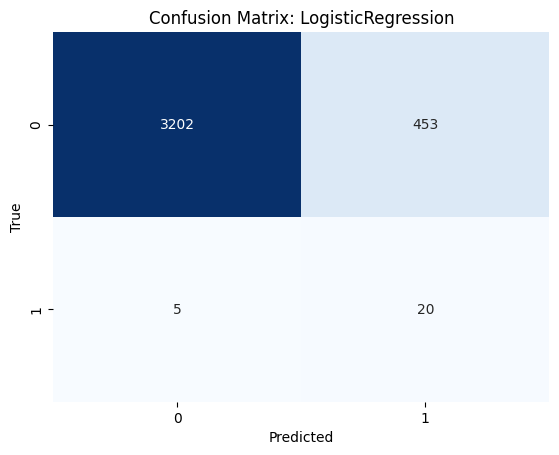

Confusion matrix saved for LogisticRegression.


<Figure size 640x480 with 0 Axes>

ROC curve saved for LogisticRegression.


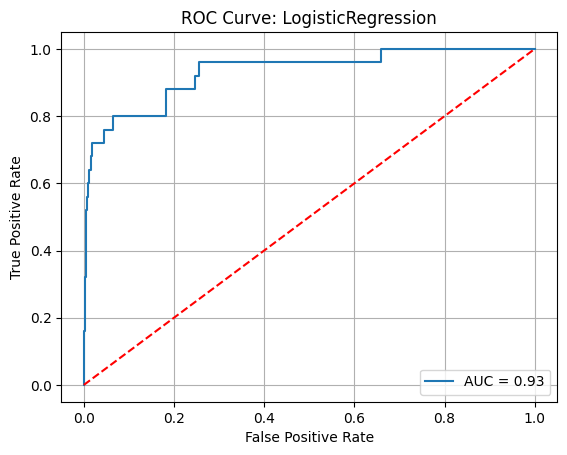

Learning curve saved for LogisticRegression.


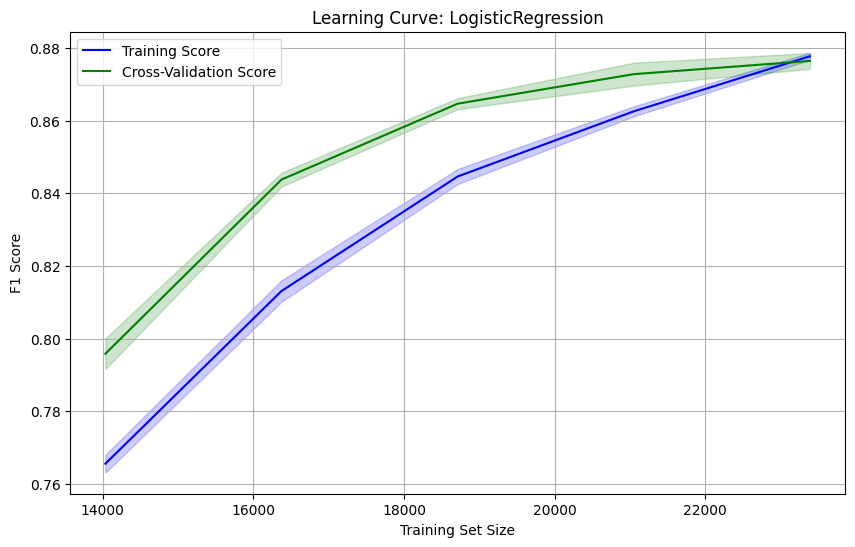

Metrics saved to metrics/logistic_test_metrics.json.
Model saved to models/logistic_test_model.pkl.


In [ ]:
# Quick test of the full pipeline
print("Testing full pipeline with Logistic Regression.")
metrics, best_model = full_pipeline(
    df=df,
    target="y",
    model=LogisticRegression(random_state=42),
    param_grid=None,  # No hyperparameter tuning for this test
    search_type="grid",
    plot_learning_curve=True
)

# Save test results
save_metrics(metrics, "metrics/logistic_test_metrics.json")
save_model(best_model, "models/logistic_test_model.pkl")


### Logistic Regression

Train, Evaluate, and Tune Logistic Regression (Baseline Model)

Removed datetime features: []

No duplicate rows found.

Applied skewness correction to 36 features.

Outliers handled using IQR Capping method.


Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.88      0.93      3655
           1       0.04      0.80      0.08        25

    accuracy                           0.88      3680
   macro avg       0.52      0.84      0.51      3680
weighted avg       0.99      0.88      0.93      3680


Confusion Matrix:


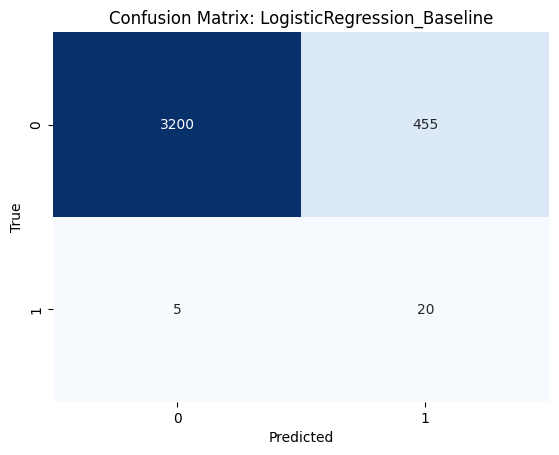

Confusion matrix saved for LogisticRegression_Baseline.


<Figure size 640x480 with 0 Axes>

ROC curve saved for LogisticRegression_Baseline.


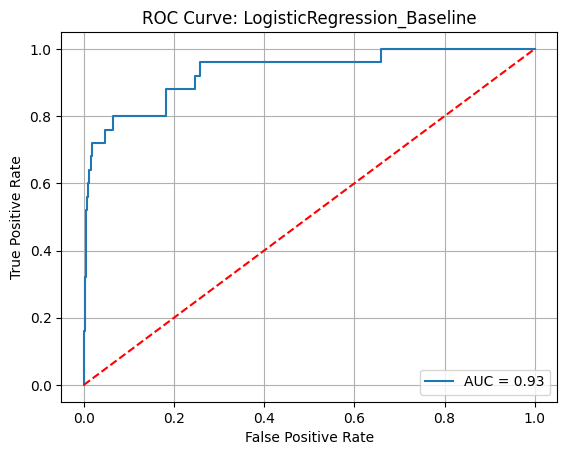

Learning curve saved for LogisticRegression_Baseline.


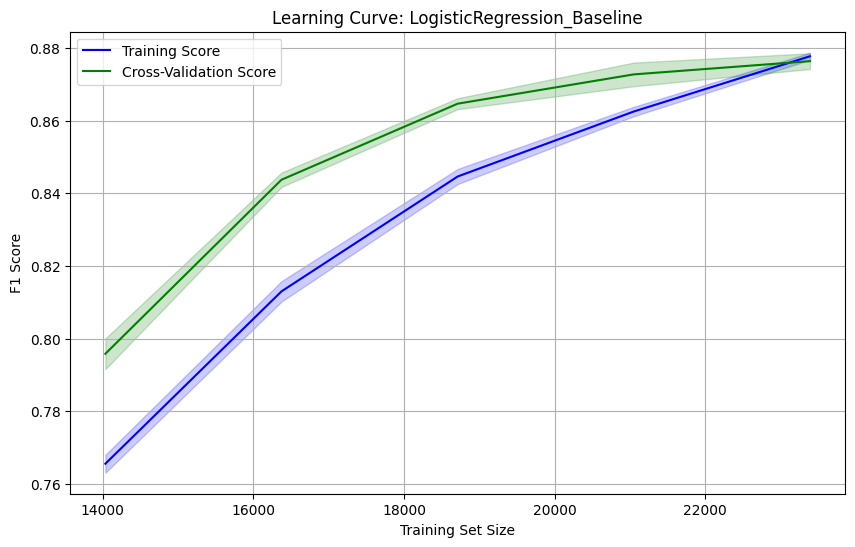

Metrics saved to metrics/logistic_baseline_metrics.json.
Model saved to models/logistic_baseline_model.pkl.
Baseline Logistic Regression Metrics:
{'accuracy': 0.875, 'precision': 0.042105263157894736, 'recall': 0.8, 'f1_score': 0.08, 'roc_auc': 0.9305499316005471}


In [64]:
# Baseline Logistic Regression Model
# ----------------------------------

# Initializing the Logistic Regression model
logistic_baseline_model = LogisticRegression(random_state=42)

# Preprocessing the data (without tuning, only train and evaluate)
X_train, X_test, y_train, y_test = preprocess_data(df, target="y")

# Training and evaluating the baseline model
logistic_metrics_baseline = train_and_evaluate_model(
    logistic_baseline_model, X_train, X_test, y_train, y_test,
    plot_learning_curve=True,
    model_name="LogisticRegression_Baseline"
)

# Saving baseline metrics and model
save_metrics(logistic_metrics_baseline, "metrics/logistic_baseline_metrics.json")
save_model(logistic_baseline_model, "models/logistic_baseline_model.pkl")

print("Baseline Logistic Regression Metrics:")
print(logistic_metrics_baseline)

Logistic Regression (Baseline Model) - Results Analysis

Preprocessing Summary:

  1.	Datetime Features: No datetime columns were identified or removed.
  2.	Duplicates: No duplicate rows were found in the dataset.
  3.	Skewness Correction: Applied to 36 features using the Yeo-Johnson transformation to handle skewness effectively.
  4.	Outlier Handling: Outliers in numerical features were capped using the Interquartile Range (IQR) method.

Evaluation Metrics:

1.	Classification Report:
  -	Class 0 (Majority Class):
  -	Precision: 1.00 indicates that all predictions for Class 0 were accurate.
  -	Recall: 0.88 means 88% of the actual Class 0 instances were correctly identified.
  -	F1-Score: 0.93 shows a strong balance between precision and recall.
  -	Class 1 (Minority Class):
  -	Precision: 0.04 is very low, indicating many false positives for Class 1.
  -	Recall: 0.80 means 80% of the actual Class 1 instances were correctly identified.
  -	F1-Score: 0.08 is low due to the imbalance between precision and recall.
  -	Accuracy: 88%, primarily driven by the correct classification of the majority class.
  -	Macro Avg: Averages precision, recall, and F1-score equally across both classes. These values indicate the performance across both classes without favoring the majority class.
  -	Weighted Avg: Accounts for the imbalance by giving more weight to the majority class. These scores align with the overall accuracy.

2.	Confusion Matrix:
  -	True Positives (Class 1): 20 cases of Class 1 correctly identified.
  -	True Negatives (Class 0): 3200 cases of Class 0 correctly identified.
  -	False Positives (Class 1 incorrectly predicted as 0): 455 cases.
  -	False Negatives (Class 0 incorrectly predicted as 1): 5 cases.
  -	Observation: The model struggles with precision for Class 1 (minority class), leading to many false positives.
3.	ROC Curve and AUC:
  -	AUC: 0.93 indicates excellent model performance in distinguishing between the two classes.
  -	The curve shows a good trade-off between the True Positive Rate (TPR) and False Positive Rate (FPR).

Insights:

1.	Class Imbalance:
  -	The dataset is highly imbalanced, with Class 1 representing only 25 samples. This imbalance significantly affects the precision for Class 1, as the model prioritizes the majority class.
  -	While recall for Class 1 (minority class) is high, precision is extremely low, which means the model makes many incorrect predictions for Class 1.
2.	Model Strengths:
  -	The model effectively identifies the majority class (Class 0), achieving perfect precision and high recall.
  -	AUC of 0.93 demonstrates the model’s strong ability to differentiate between the two classes.
3.	Model Weaknesses:
  -	Precision for the minority class is a significant weakness, indicating the model struggles to balance performance for both classes.
  -	The F1-score for Class 1 is low (0.08), showing poor overall performance for the minority class.



Removed datetime features: []

No duplicate rows found.

Applied skewness correction to 36 features.

Outliers handled using IQR Capping method.

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Hyperparameters: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.88      0.93      3655
           1       0.04      0.80      0.08        25

    accuracy                           0.88      3680
   macro avg       0.52      0.84      0.51      3680
weighted avg       0.99      0.88      0.93      3680


Confusion Matrix:


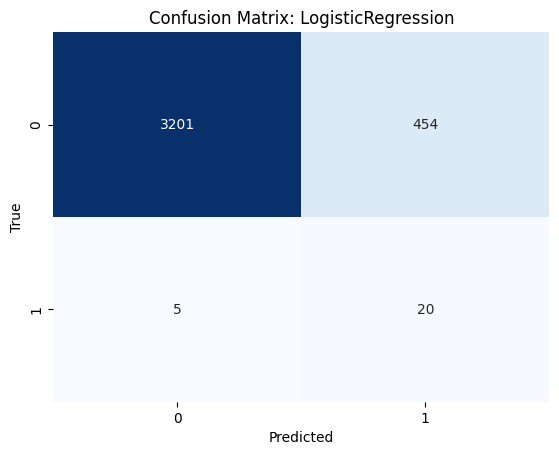

Confusion matrix saved for LogisticRegression.


<Figure size 640x480 with 0 Axes>

ROC curve saved for LogisticRegression.


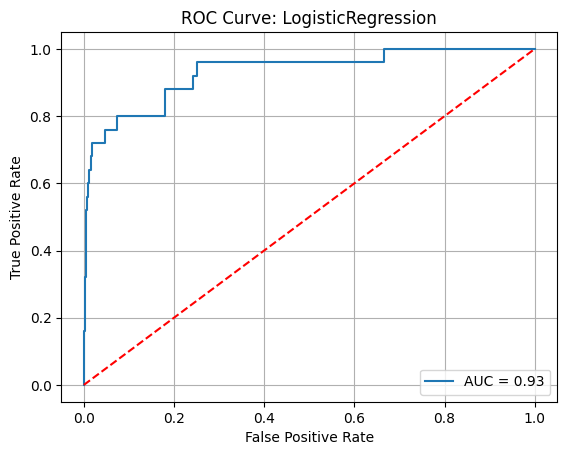

Learning curve saved for LogisticRegression.


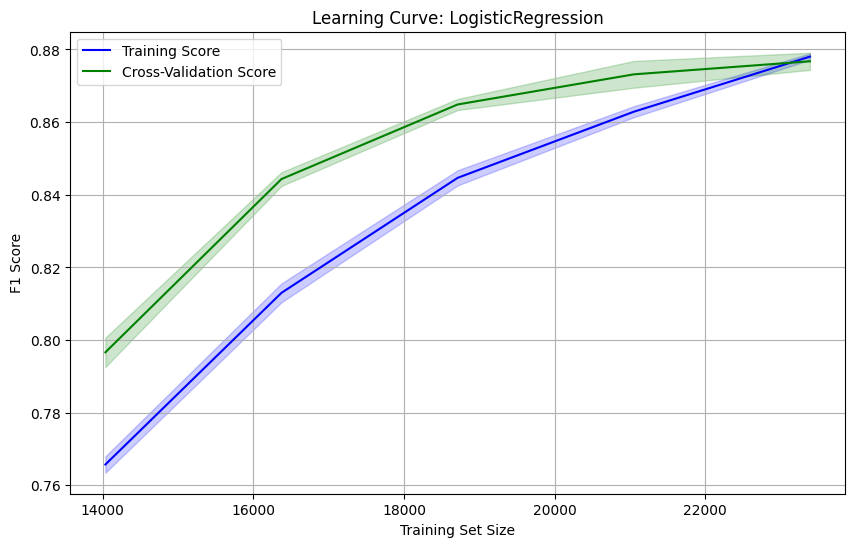

Metrics saved to metrics/logistic_tuned_metrics_v1.json.
Model saved to models/logistic_tuned_model_v1.pkl.
Tuned Logistic Regression Metrics (Version 1):
{'accuracy': 0.8752717391304348, 'precision': 0.04219409282700422, 'recall': 0.8, 'f1_score': 0.08016032064128256, 'roc_auc': 0.9303529411764706}


In [65]:
# First Hyperparameter Tuning for Logistic Regression
# ----------------------------------------------------

# Defining parameter grid for Logistic Regression (First Tuning)
param_grid_logistic_v1 = {
    "C": [0.01, 0.1, 1, 10, 100],        # Regularization strength
    "solver": ["liblinear", "lbfgs"],    # Solvers supporting binary classification
    "penalty": ["l2"]                    # Penalty type
}

# Running full_pipeline for tuning, evaluation, and visualization
logistic_metrics_tuned_v1, best_logistic_model_v1 = full_pipeline(
    df=df, target="y", model=LogisticRegression(random_state=42),
    param_grid=param_grid_logistic_v1,
    search_type="grid",
    plot_learning_curve=True
)

# Saving tuned metrics and model
save_metrics(logistic_metrics_tuned_v1, "metrics/logistic_tuned_metrics_v1.json")
save_model(best_logistic_model_v1, "models/logistic_tuned_model_v1.pkl")

print("Tuned Logistic Regression Metrics (Version 1):")
print(logistic_metrics_tuned_v1)

Tuned Model Results

After applying hyperparameter tuning with the following best parameters:

-	C=100 (High regularization strength)
- solver='liblinear'
-	penalty='l2' (Standard L2 regularization)

	1.	Classification Report (Tuned):
-	Precision (Class 1): Slight improvement (4.2%) – False-positive rate remains high but slightly better.
-	Recall (Class 1): Maintains 80%, indicating consistent ability to identify true positives.
-	F1-Score (Class 1): Improved slightly to 8.0%.
Insights:
-	Hyperparameter tuning brought minimal improvement due to inherent class imbalance.
-	Further tuning or alternative sampling techniques may help boost precision.
	2.	Confusion Matrix (Tuned):
-	Class 0 (Majority): Minimal improvement in correct classification (3201 vs. 3200).
-	Class 1 (Minority): Remains consistent with 20 true positives and 5 false negatives.
Insights:
-	The confusion matrix highlights the model’s bias toward the majority class, even after tuning.
	3.	ROC Curve and AUC (Tuned):
-	AUC: 0.93 (No significant change) – Confirms that the model still separates the two classes well in terms of overall discrimination.
	4.	Learning Curve (Tuned):
-	Demonstrates convergence between training and cross-validation scores as the dataset grows.
-	The consistent trend shows minimal overfitting and stable generalization.

Key Observations Across Baseline and Tuned Logistic Models

-	Class Imbalance: The minority class (Class 1) remains underrepresented and poorly classified despite tuning.
-	High AUC vs. Low Precision: The high AUC reflects good class separation overall but fails to address the minority class’s precision issues.
-	F1-Score (Class 1): Poor in both baseline and tuned models, signaling that further improvements are needed for minority class performance.

Removed datetime features: []

No duplicate rows found.

Applied skewness correction to 36 features.

Outliers handled using IQR Capping method.

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best Hyperparameters: {'C': 100, 'penalty': 'l2', 'solver': 'saga'}

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.88      0.93      3655
           1       0.04      0.80      0.08        25

    accuracy                           0.88      3680
   macro avg       0.52      0.84      0.51      3680
weighted avg       0.99      0.88      0.93      3680


Confusion Matrix:


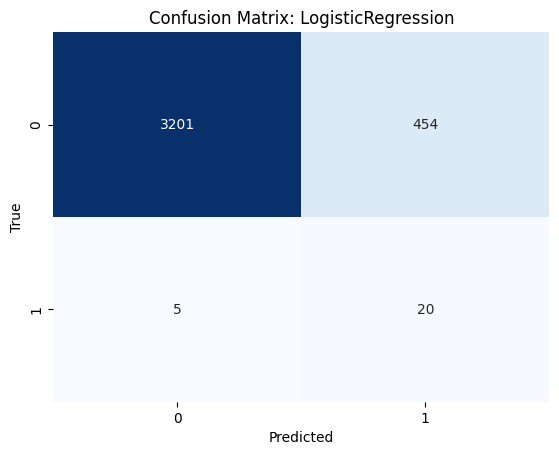

Confusion matrix saved for LogisticRegression.


<Figure size 640x480 with 0 Axes>

ROC curve saved for LogisticRegression.


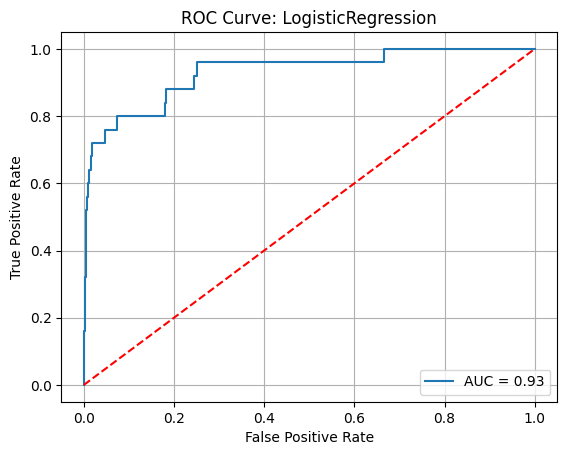

Learning curve saved for LogisticRegression.


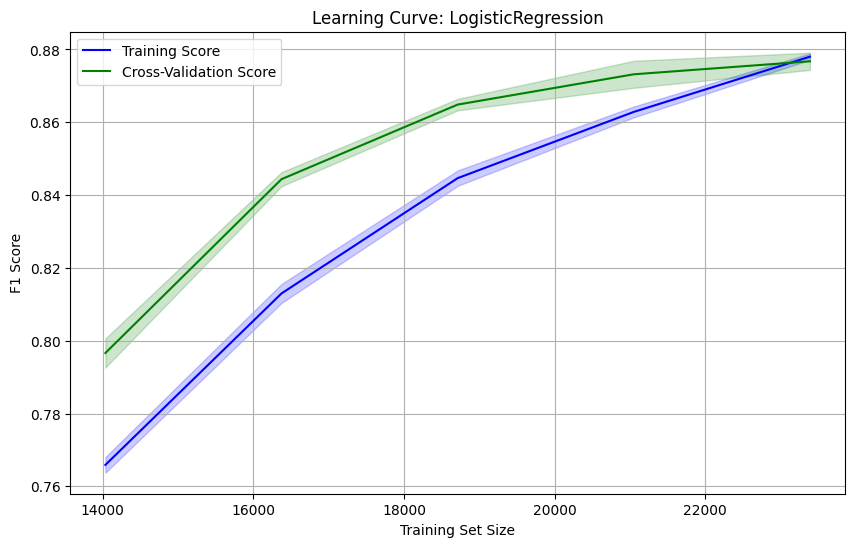

Metrics saved to metrics/logistic_tuned_metrics_v2.json.
Model saved to models/logistic_tuned_model_v2.pkl.
Tuned Logistic Regression Metrics (Version 2):
{'accuracy': 0.8752717391304348, 'precision': 0.04219409282700422, 'recall': 0.8, 'f1_score': 0.08016032064128256, 'roc_auc': 0.9303091655266758}


In [66]:
# Second Hyperparameter Tuning for Logistic Regression
# -----------------------------------------------------

# Defining parameter grid for Logistic Regression (Second Tuning)
param_grid_logistic_v2 = {
    "C": [0.01, 0.1, 1, 10, 100, 1000],  # Expanded regularization range
    "solver": ["liblinear", "lbfgs", "saga"],  # Adding 'saga' for larger datasets
    "penalty": ["l2", "none"]            # Adding 'none' to test without regularization
}

# Running full_pipeline for fine-tuning, evaluation, and visualization
logistic_metrics_tuned_v2, best_logistic_model_v2 = full_pipeline(
    df=df, target="y", model=LogisticRegression(random_state=42),
    param_grid=param_grid_logistic_v2,
    search_type="grid",
    plot_learning_curve=True
)

# Saving fine-tuned metrics and model
save_metrics(logistic_metrics_tuned_v2, "metrics/logistic_tuned_metrics_v2.json")
save_model(best_logistic_model_v2, "models/logistic_tuned_model_v2.pkl")

print("Tuned Logistic Regression Metrics (Version 2):")
print(logistic_metrics_tuned_v2)

DECISION TREE CLASSIFIER

Removed datetime features: []

No duplicate rows found.

Applied skewness correction to 36 features.

Outliers handled using IQR Capping method.


Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      3655
           1       0.27      0.64      0.38        25

    accuracy                           0.99      3680
   macro avg       0.63      0.81      0.68      3680
weighted avg       0.99      0.99      0.99      3680


Confusion Matrix:


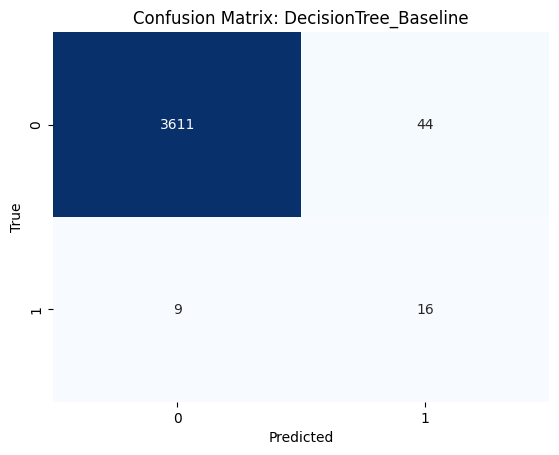

Confusion matrix saved for DecisionTree_Baseline.


<Figure size 640x480 with 0 Axes>

ROC curve saved for DecisionTree_Baseline.


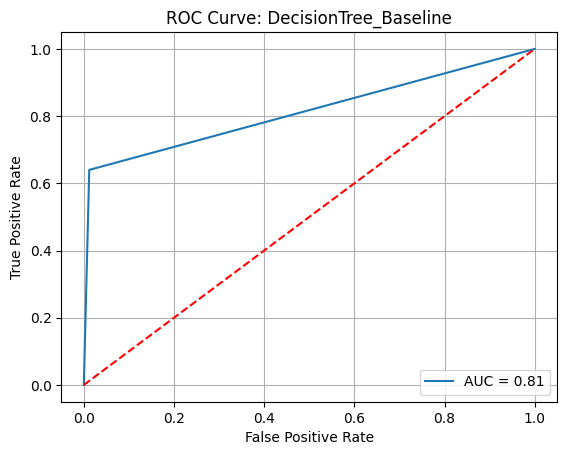

Learning curve saved for DecisionTree_Baseline.


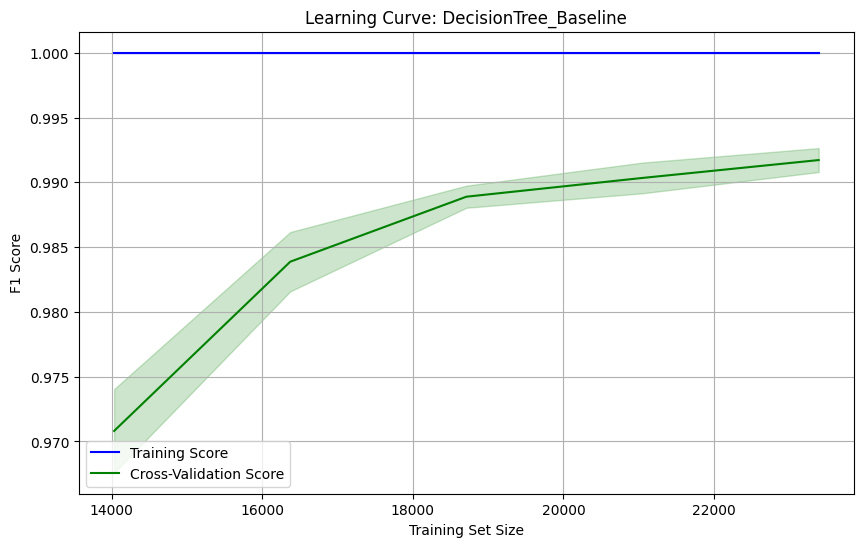

Decision tree plot saved for DecisionTree_Baseline.


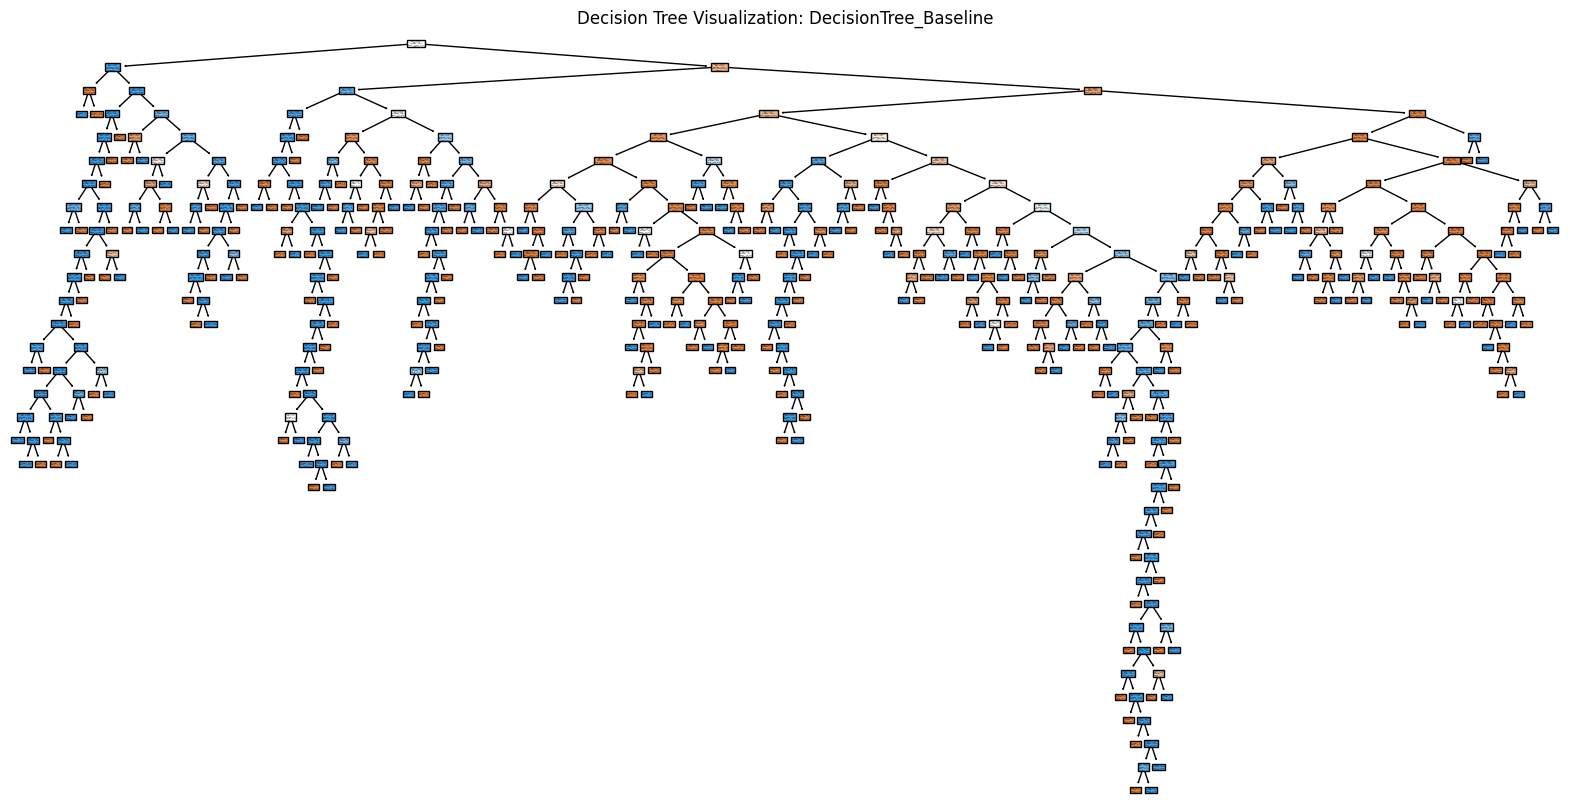


Text Representation of Decision Tree:
|--- x3 <= -1.22
|   |--- x3 <= -2.97
|   |   |--- x5 <= -1.34
|   |   |   |--- class: 1
|   |   |--- x5 >  -1.34
|   |   |   |--- class: 0
|   |--- x3 >  -2.97
|   |   |--- x3 <= -1.38
|   |   |   |--- x39 <= 2.11
|   |   |   |   |--- x11 <= 2.70
|   |   |   |   |   |--- x38 <= 2.14
|   |   |   |   |   |   |--- x33 <= -1.31
|   |   |   |   |   |   |   |--- x17 <= -1.32
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |--- x17 >  -1.32
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- x33 >  -1.31
|   |   |   |   |   |   |   |--- x31 <= 2.30
|   |   |   |   |   |   |   |   |--- x22 <= 2.17
|   |   |   |   |   |   |   |   |   |--- x9 <= 2.55
|   |   |   |   |   |   |   |   |   |   |--- x54 <= 1.39
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 8
|   |   |   |   |   |   |   |   |   |   |--- x54 >  1.39
|   |   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |

In [67]:
# Baseline Decision Tree Model
# -----------------------------

# Initializing the Decision Tree Classifier
dt_baseline_model = DecisionTreeClassifier(random_state=42)

# Preprocessing the data (without tuning, only train and evaluate)
X_train, X_test, y_train, y_test = preprocess_data(df, target='y')

# Training and evaluating the baseline model
dt_metrics_baseline = train_and_evaluate_model(
    dt_baseline_model, X_train, X_test, y_train, y_test,
    plot_learning_curve=True, model_name="DecisionTree_Baseline"
)

# Saving baseline metrics and model
save_metrics(dt_metrics_baseline, "metrics/decision_tree_baseline_metrics.json")
save_model(dt_baseline_model, "models/decision_tree_baseline_model.pkl")

print("Baseline Decision Tree Metrics:")
print(dt_metrics_baseline)


1. Key Metrics

  -	Accuracy: 99%
  -	Precision:
  -	Class 0 (Majority class): 100%
  -	Class 1 (Minority class): 27%
  -	Recall:
  -	Class 0: 99%
  -	Class 1: 64%
  -	F1-Score:
  -	Class 0: 99%
  -	Class 1: 38%
  -	Weighted Average F1-Score: 99%

2. Insights from the Metrics

  -	The model performed well overall due to the high accuracy of 99%. However, accuracy alone is misleading given the class imbalance.
  -	The minority class (Class 1) is poorly predicted:
  -	Precision is low (27%), meaning a high proportion of the predicted positive cases are incorrect.
  -	Recall for the minority class (64%) indicates that while some positive cases are captured, a significant number are still missed.
  -	The low F1-Score (38%) for the minority class highlights the model’s inability to balance precision and recall effectively.

3. Confusion Matrix

  -	True Positives (Class 1 correctly identified): 16
  -	True Negatives (Class 0 correctly identified): 3611
  -	False Positives (Class 1 incorrectly identified): 44
  - False Negatives (Class 1 missed): 9

  The confusion matrix indicates that the model is good at identifying the majority class but struggles with the minority class.

4. ROC Curve

  -	The AUC score of 0.81 is reasonable, indicating a moderately good ability to distinguish between the classes.
  -	The curve shows the trade-off between true positive rate and false positive rate.

5. Learning Curve

  -	The training score remains at 100%, indicating the model has overfitted the training data.
  -	The cross-validation score (around 99%) does not significantly deviate from the training score, which could be due to the model’s capacity to memorize the data, especially for the majority class.

Removed datetime features: []

No duplicate rows found.

Applied skewness correction to 36 features.

Outliers handled using IQR Capping method.

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best Hyperparameters: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5}

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      3655
           1       0.29      0.64      0.40        25

    accuracy                           0.99      3680
   macro avg       0.64      0.81      0.69      3680
weighted avg       0.99      0.99      0.99      3680


Confusion Matrix:


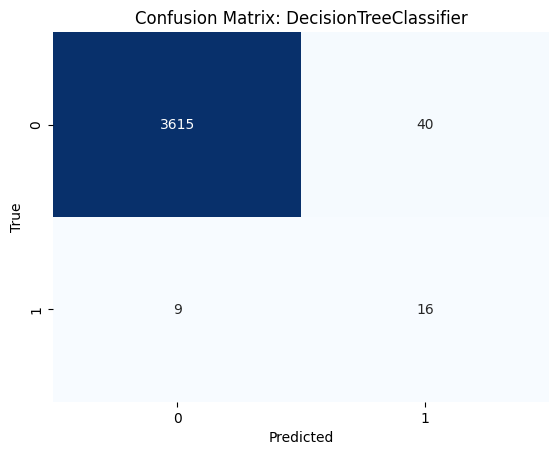

Confusion matrix saved for DecisionTreeClassifier.


<Figure size 640x480 with 0 Axes>

ROC curve saved for DecisionTreeClassifier.


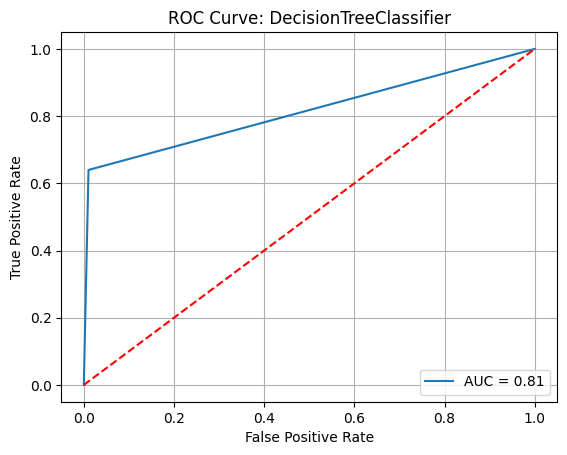

Learning curve saved for DecisionTreeClassifier.


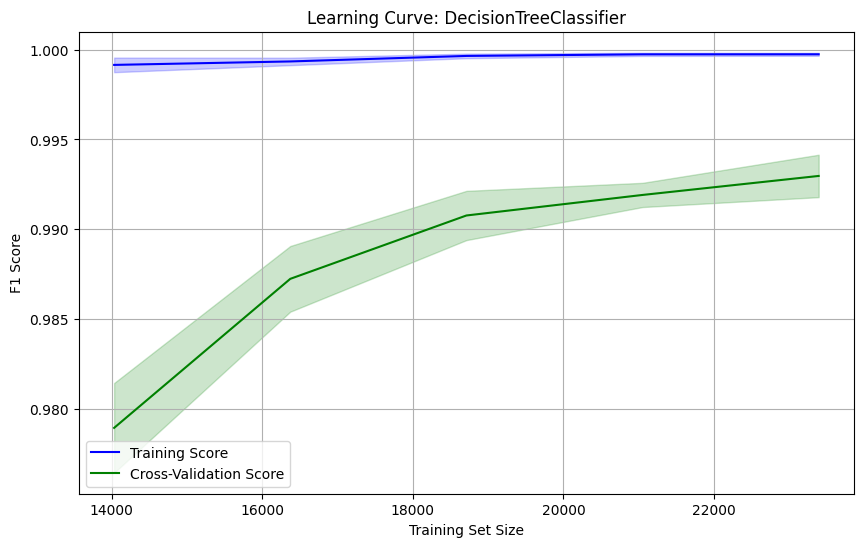

Decision tree plot saved for DecisionTreeClassifier.


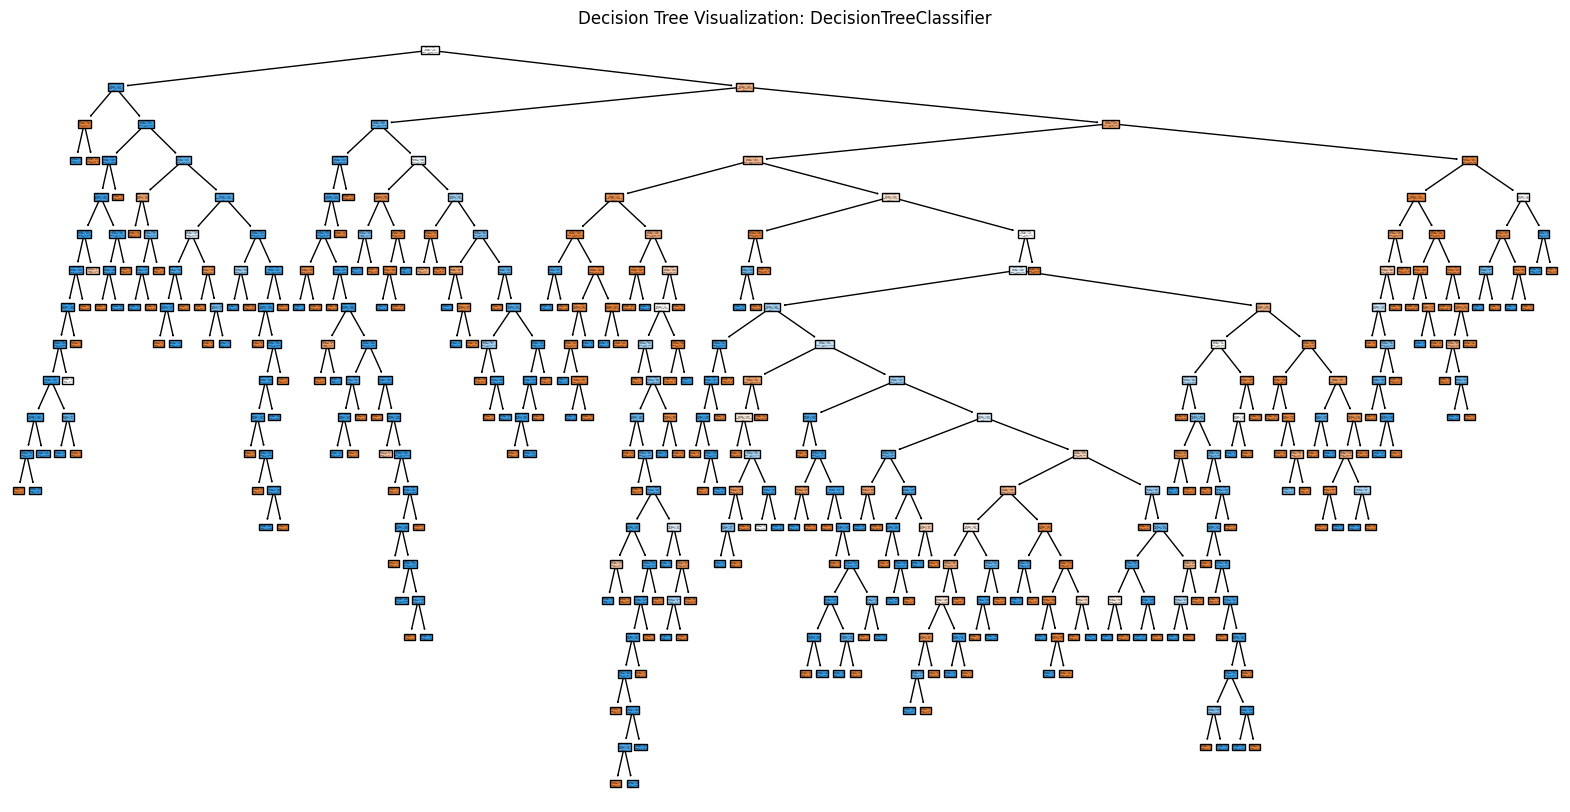


Text Representation of Decision Tree:
|--- x3 <= -1.24
|   |--- x3 <= -2.97
|   |   |--- x5 <= -1.34
|   |   |   |--- class: 1
|   |   |--- x5 >  -1.34
|   |   |   |--- class: 0
|   |--- x3 >  -2.97
|   |   |--- x3 <= -1.44
|   |   |   |--- x11 <= 2.70
|   |   |   |   |--- x2 <= 0.11
|   |   |   |   |   |--- x22 <= 2.17
|   |   |   |   |   |   |--- x54 <= 1.39
|   |   |   |   |   |   |   |--- x9 <= 2.55
|   |   |   |   |   |   |   |   |--- x7 <= 4.35
|   |   |   |   |   |   |   |   |   |--- x13 <= 1.47
|   |   |   |   |   |   |   |   |   |   |--- x33 <= -1.32
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 2
|   |   |   |   |   |   |   |   |   |   |--- x33 >  -1.32
|   |   |   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |   |--- x13 >  1.47
|   |   |   |   |   |   |   |   |   |   |--- x11 <= -0.86
|   |   |   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |   |   |--- x11 >  -0.86
|   |   |   |

In [ ]:
# First Tuning for Decision Tree
# ------------------------------

# Defining the hyperparameter grid
param_grid_dt_v1 = {
    "max_depth": [3, 5, 10, None],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 5],
    "criterion": ["gini", "entropy"]
}

# Running the full pipeline for Decision Tree
dt_metrics_tuned_v1, best_dt_model_v1 = full_pipeline(
    df=df, target="y", model=DecisionTreeClassifier(random_state=42),
    param_grid=param_grid_dt_v1, search_type="grid", plot_learning_curve=True
)

# Saving tuned metrics and model
save_metrics(dt_metrics_tuned_v1, "metrics/decision_tree_tuned_metrics_v1.json")
save_model(best_dt_model_v1, "models/decision_tree_tuned_model_v1.pkl")

print("Tuned Decision Tree Metrics (Version 1):")
print(dt_metrics_tuned_v1)


Decision Tree Classifier Analysis

Baseline Model Insights:

1.	Confusion Matrix Analysis:
  -	True Negatives (0 classified as 0): 3611
	-	False Positives (0 classified as 1): 44
	-	False Negatives (1 classified as 0): 9
	-	True Positives (1 classified as 1): 16
	-	The majority class (0) dominates the predictions, which is expected given the class imbalance.
	-	A notable improvement in identifying the minority class compared to Logistic Regression, but the False Positives are higher.
2.	Classification Report:
	-	Precision for Class 1: 27% — Out of all instances predicted as class 1, 27% were correct. This is a reasonable improvement compared to Logistic Regression’s baseline.
	-	Recall for Class 1: 64% — The model captures 64% of all actual class 1 instances.
	-	F1-Score for Class 1: 38% — Balanced between precision and recall, showing moderate success for the minority class.
3.	ROC Curve:
	-	AUC = 0.81: Indicates decent separation between classes, better than Logistic Regression’s baseline.
	-	The Decision Tree is better at handling class imbalance due to its inherent ability to partition the data.
4.	Learning Curve:
	-	The training score is consistently perfect, indicating that the model fits the training data completely.
	-	The validation score shows a small gap, suggesting mild overfitting.

Tuned Model Insights:

1.	Hyperparameter Tuning:
	-	Best Parameters Identified:
	-	criterion: entropy — Indicates the use of information gain as the splitting criterion.
	-	max_depth: None — Allows the tree to grow fully unless constrained by other parameters.
	-	min_samples_leaf: 1 — Allows splitting even with a single data point.
	-	min_samples_split: 5 — Ensures splits occur only when there are at least 5 samples.
	-	These parameters optimize the balance between model complexity and generalization.
2.	Confusion Matrix Analysis:
	-	True Negatives: 3615
	-	False Positives: 40
	-	False Negatives: 9
	-	True Positives: 16
	-	Slight improvement in False Positives compared to the baseline while maintaining the same True Positives.
3.	Classification Report:
	-	Precision for Class 1: 29% — Marginal improvement from the baseline.
	-	Recall for Class 1: 64% — Identical to the baseline.
	-	F1-Score for Class 1: 40% — Slight improvement compared to the baseline.
4.	ROC Curve:
	-	AUC = 0.81: Same as the baseline, indicating tuning helped maintain performance.
5.	Learning Curve:
	-	Validation scores have improved, and the variance across folds has decreased, showing improved generalization.
	-	Training score is still perfect, indicating overfitting persists despite tuning.

Observations:
	-	The Decision Tree Classifier performs well on the majority class (class 0) while moderately improving predictions for the minority class (class 1).
	-	The tuned model shows slight improvement in precision and F1-score for class 1.


Hyperparameter Tuning

Removed datetime features: []

No duplicate rows found.

Applied skewness correction to 36 features.

Outliers handled using IQR Capping method.

Fitting 5 folds for each of 160 candidates, totalling 800 fits
Best Hyperparameters: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5}

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      3655
           1       0.29      0.64      0.40        25

    accuracy                           0.99      3680
   macro avg       0.64      0.81      0.69      3680
weighted avg       0.99      0.99      0.99      3680


Confusion Matrix:


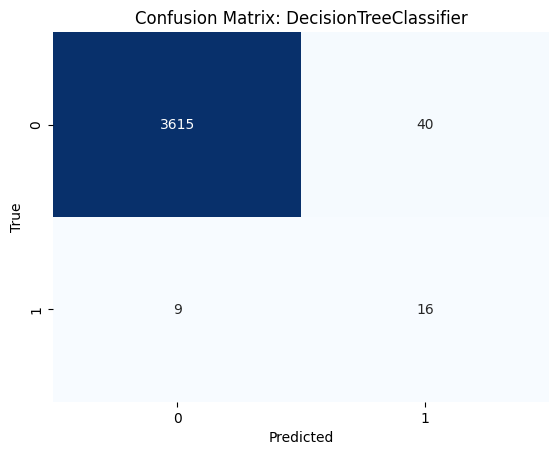

Confusion matrix saved for DecisionTreeClassifier.


<Figure size 640x480 with 0 Axes>

ROC curve saved for DecisionTreeClassifier.


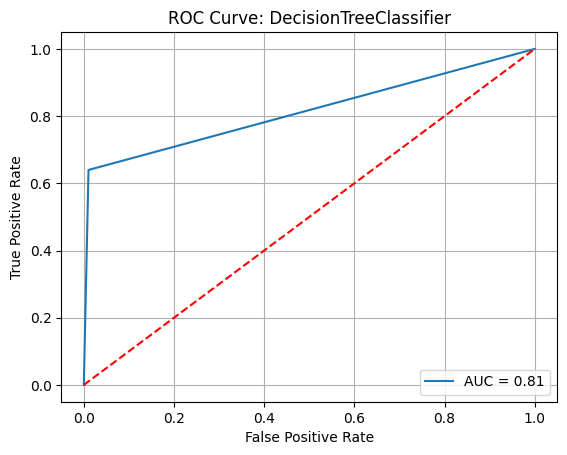

Learning curve saved for DecisionTreeClassifier.


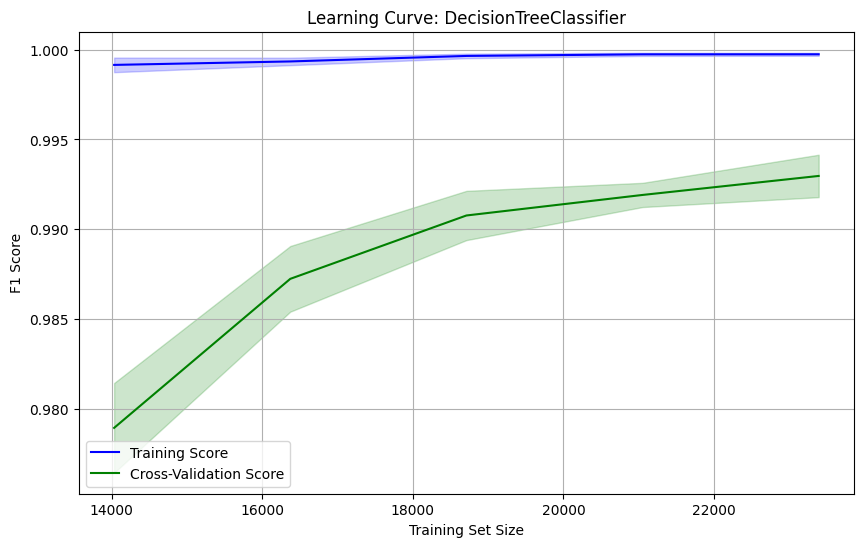

Decision tree plot saved for DecisionTreeClassifier.


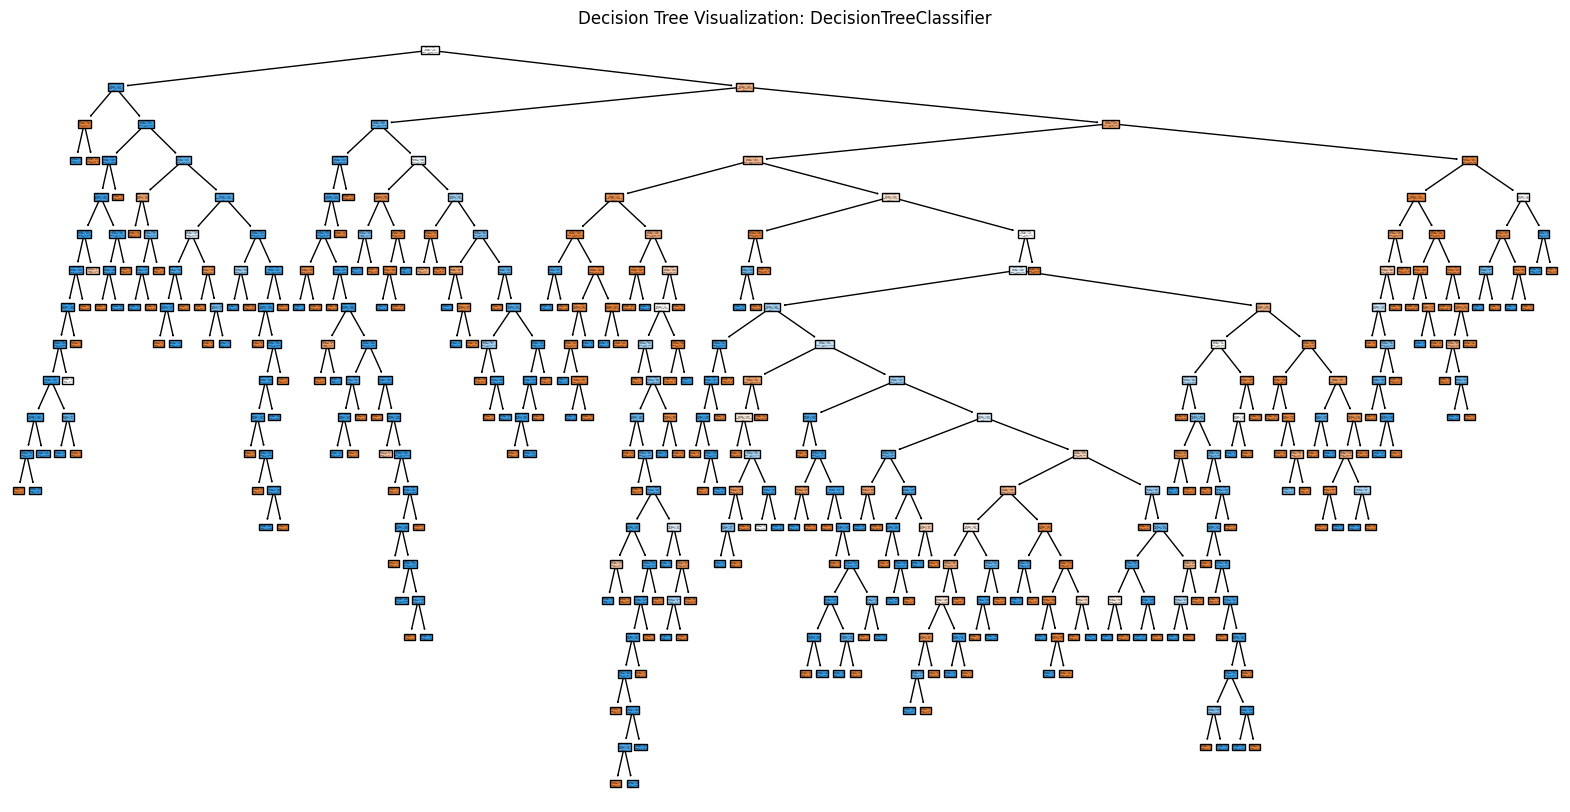


Text Representation of Decision Tree:
|--- x3 <= -1.24
|   |--- x3 <= -2.97
|   |   |--- x5 <= -1.34
|   |   |   |--- class: 1
|   |   |--- x5 >  -1.34
|   |   |   |--- class: 0
|   |--- x3 >  -2.97
|   |   |--- x3 <= -1.44
|   |   |   |--- x11 <= 2.70
|   |   |   |   |--- x2 <= 0.11
|   |   |   |   |   |--- x22 <= 2.17
|   |   |   |   |   |   |--- x54 <= 1.39
|   |   |   |   |   |   |   |--- x9 <= 2.55
|   |   |   |   |   |   |   |   |--- x7 <= 4.35
|   |   |   |   |   |   |   |   |   |--- x13 <= 1.47
|   |   |   |   |   |   |   |   |   |   |--- x33 <= -1.32
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 2
|   |   |   |   |   |   |   |   |   |   |--- x33 >  -1.32
|   |   |   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |   |--- x13 >  1.47
|   |   |   |   |   |   |   |   |   |   |--- x11 <= -0.86
|   |   |   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |   |   |--- x11 >  -0.86
|   |   |   |

In [ ]:
# Second Tuning for Decision Tree
# -------------------------------

# Defining the hyperparameter grid (extended)
param_grid_dt_v2 = {
    'max_depth': [5, 10, 15, 20, None],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 5, 10],
    'criterion': ['gini', 'entropy']
}

# Running the full pipeline for Decision Tree
dt_metrics_tuned_v2, best_dt_model_v2 = full_pipeline(
    df=df, target="y", model=DecisionTreeClassifier(random_state=42),
    param_grid=param_grid_dt_v2, search_type="grid", plot_learning_curve=True
)

# Saving tuned metrics and model
save_metrics(dt_metrics_tuned_v2, "metrics/decision_tree_tuned_metrics_v2.json")
save_model(best_dt_model_v2, "models/decision_tree_tuned_model_v2.pkl")

print("Tuned Decision Tree Metrics (Version 2):")
print(dt_metrics_tuned_v2)

RANDOM FOREST CLASSIFIER


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3655
           1       0.75      0.60      0.67        25

    accuracy                           1.00      3680
   macro avg       0.87      0.80      0.83      3680
weighted avg       1.00      1.00      1.00      3680


Confusion Matrix:


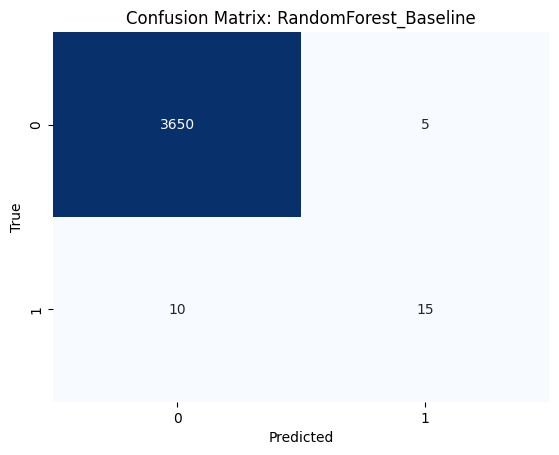

Confusion matrix saved for RandomForest_Baseline.


<Figure size 640x480 with 0 Axes>

ROC curve saved for RandomForest_Baseline.


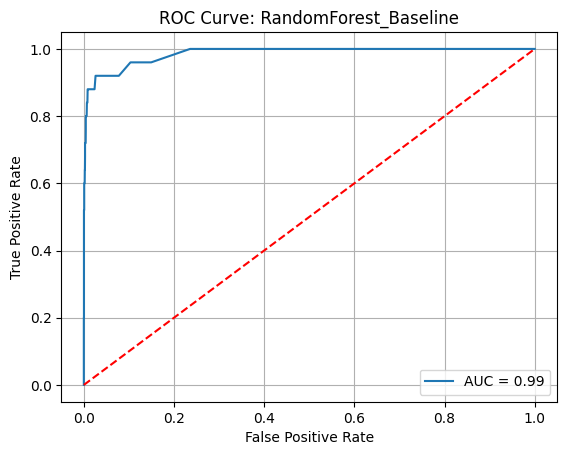

Learning curve saved for RandomForest_Baseline.


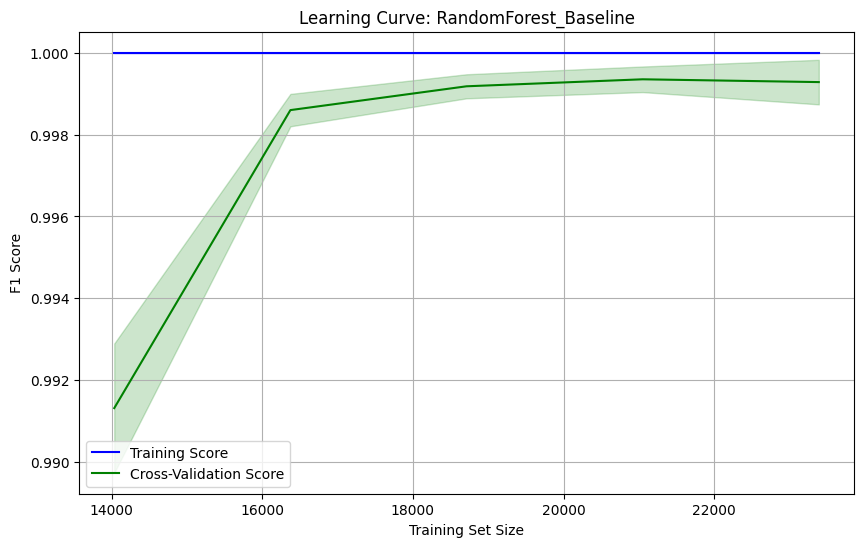

Random Forest Decision tree plot saved for RandomForest_Baseline.


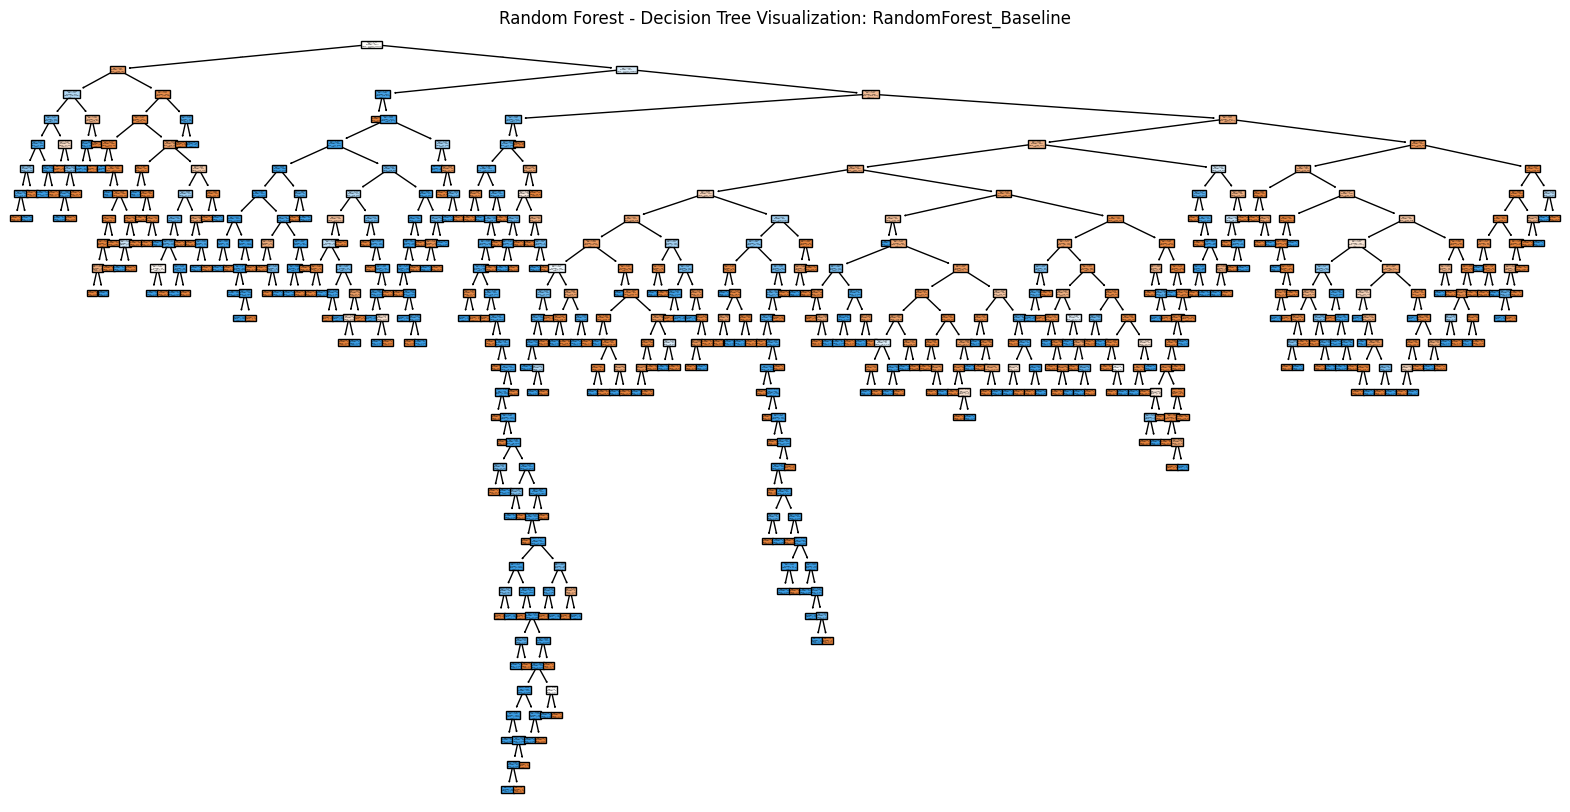


Text Representation of a Decision Tree in Random Forest:
|--- x28 <= -1.18
|   |--- x48 <= -1.00
|   |   |--- x16 <= 0.40
|   |   |   |--- x18 <= -0.36
|   |   |   |   |--- x16 <= -0.54
|   |   |   |   |   |--- x2 <= 0.09
|   |   |   |   |   |   |--- x17 <= 0.53
|   |   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |   |   |--- x17 >  0.53
|   |   |   |   |   |   |   |--- class: 1.0
|   |   |   |   |   |--- x2 >  0.09
|   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |--- x16 >  -0.54
|   |   |   |   |   |--- x45 <= 0.74
|   |   |   |   |   |   |--- class: 1.0
|   |   |   |   |   |--- x45 >  0.74
|   |   |   |   |   |   |--- class: 0.0
|   |   |   |--- x18 >  -0.36
|   |   |   |   |--- x15 <= -0.19
|   |   |   |   |   |--- class: 0.0
|   |   |   |   |--- x15 >  -0.19
|   |   |   |   |   |--- x44 <= -0.14
|   |   |   |   |   |   |--- x8 <= 1.56
|   |   |   |   |   |   |   |--- class: 1.0
|   |   |   |   |   |   |--- x8 >  1.56
|   |   |   |   |   |   |   |--- class: 0.0
|  

In [ ]:
# Baseline Random Forest Model
# -----------------------------

# Initializing the Random Forest Classifier
rf_baseline_model = RandomForestClassifier(random_state=42)

# Training and evaluating the baseline model
rf_metrics_baseline = train_and_evaluate_model(
    rf_baseline_model, X_train, X_test, y_train, y_test,
    plot_learning_curve=True, model_name="RandomForest_Baseline"
)

# Saving baseline metrics and model
save_metrics(rf_metrics_baseline, "metrics/random_forest_baseline_metrics.json")
save_model(rf_baseline_model, "models/random_forest_baseline_model.pkl")

print("Baseline Random Forest Metrics:")
print(rf_metrics_baseline)


1.	Classification Report:
	-	Precision for the minority class (1) is 0.75, meaning 75% of the predictions for anomalies were correct.
	-	Recall for class 1 is 0.60, meaning only 60% of the true anomalies were identified.
	-	F1-score for class 1 is 0.67, reflecting a moderate balance between precision and recall.
	-	Weighted averages are skewed by the dominant class (0), resulting in high overall metrics.
2.	Confusion Matrix:
	-	True Positives (Class 1 identified correctly): 15.
	-	False Negatives (Class 1 missed): 10.
	-	True Negatives (Class 0 identified correctly): 3650.
	-	False Positives (Class 0 misclassified as 1): 5.
3.	Learning Curve:
	-	Training score is perfect (100%), indicating potential overfitting.
	-	Cross-validation score stabilizes near the training score, suggesting the model generalizes relatively well but struggles with the minority class.

XGBoost Classifier

Removed datetime features: []

No duplicate rows found.

Applied skewness correction to 36 features.

Outliers handled using IQR Capping method.


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3655
           1       0.74      0.80      0.77        25

    accuracy                           1.00      3680
   macro avg       0.87      0.90      0.88      3680
weighted avg       1.00      1.00      1.00      3680


Confusion Matrix:


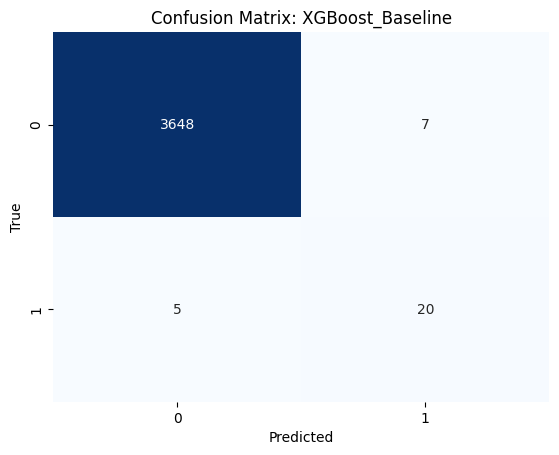

Confusion matrix saved for XGBoost_Baseline.


<Figure size 640x480 with 0 Axes>

ROC curve saved for XGBoost_Baseline.


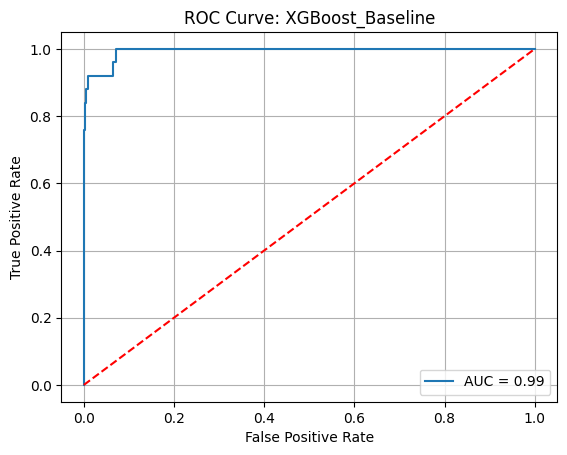

Learning curve saved for XGBoost_Baseline.


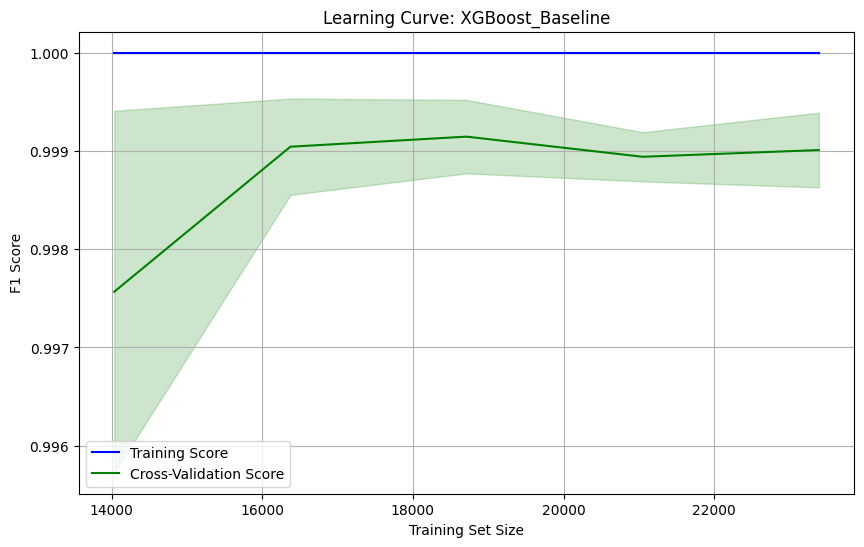

Metrics saved to metrics/xgboost_baseline_metrics.json.
Model saved to models/xgboost_baseline_model.pkl.
Baseline XGBoost Metrics:
{'accuracy': 0.9967391304347826, 'precision': 0.7407407407407407, 'recall': 0.8, 'f1_score': 0.7692307692307693, 'roc_auc': 0.9935102599179206}


In [ ]:
# Importing XGBoost
from xgboost import XGBClassifier

# Baseline XGBoost Model
# ----------------------

# Initializing the XGBoost Classifier
xgb_baseline_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric="logloss")

# Preprocessing the data (without tuning, only train and evaluate)
X_train, X_test, y_train, y_test = preprocess_data(df, target="y")

# Training and evaluating the baseline model
xgb_metrics_baseline = train_and_evaluate_model(
    xgb_baseline_model, X_train, X_test, y_train, y_test,
    plot_learning_curve=True,
    model_name="XGBoost_Baseline"
)

# Saving baseline metrics and model
save_metrics(xgb_metrics_baseline, "metrics/xgboost_baseline_metrics.json")
save_model(xgb_baseline_model, "models/xgboost_baseline_model.pkl")

print("Baseline XGBoost Metrics:")
print(xgb_metrics_baseline)

Results Analysis: XGBoost Baseline

- Key Metrics

  -	Overall Accuracy: 1.00 (Highly accurate overall, but driven by class imbalance)
	-	Precision:
	-	Class 0 (Majority Class): 1.00 (Perfect precision for the dominant class)
	-	Class 1 (Minority Class): 0.74 (Indicates that 74% of the predicted anomalies were correct)
	-	Recall:
	-	Class 0: 1.00 (All normal instances were correctly identified)
	-	Class 1: 0.80 (80% of actual anomalies were correctly identified)
	-	F1-Score:
	-	Class 1 (Minority Class): 0.77 (A good balance between precision and recall for anomalies)
	-	Macro Average:
	-	Precision: 0.87
	-	Recall: 0.90
	-	F1-Score: 0.88

Insights
1.	Class Imbalance:
	-	The overall accuracy is driven by the dominance of the majority class (Class 0).
	-	The model shows decent performance in identifying anomalies, with a recall of 80% and F1-score of 0.77.
2.	Improvement Over Previous Models:
	-	Compared to previous models (e.g., Logistic Regression or Decision Tree), XGBoost performs better in balancing precision and recall for anomalies.
3.	Model Performance:
	-	The model is robust in detecting anomalies (Class 1) with relatively low false negatives (missed anomalies).
	-	Some false positives (normal data misclassified as anomalies) are present, as reflected in the precision for Class 1.


In [ ]:
# Calculating scale_pos_weight
majority_class = df['y'].value_counts()[0]
minority_class = df['y'].value_counts()[1]  #
scale_pos_weight = majority_class / minority_class

print(f"Calculated scale_pos_weight: {scale_pos_weight}")

Calculated scale_pos_weight: 147.3709677419355


Using scale_pos_weight in XGBoost:

Removed datetime features: []

No duplicate rows found.

Applied skewness correction to 36 features.

Outliers handled using IQR Capping method.

Calculated scale_pos_weight: 147.66666666666666

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3655
           1       0.80      0.64      0.71        25

    accuracy                           1.00      3680
   macro avg       0.90      0.82      0.85      3680
weighted avg       1.00      1.00      1.00      3680


Confusion Matrix:


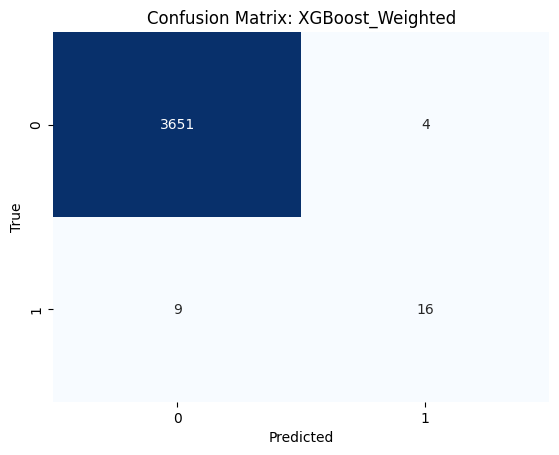

Confusion matrix saved for XGBoost_Weighted.


<Figure size 640x480 with 0 Axes>

ROC curve saved for XGBoost_Weighted.


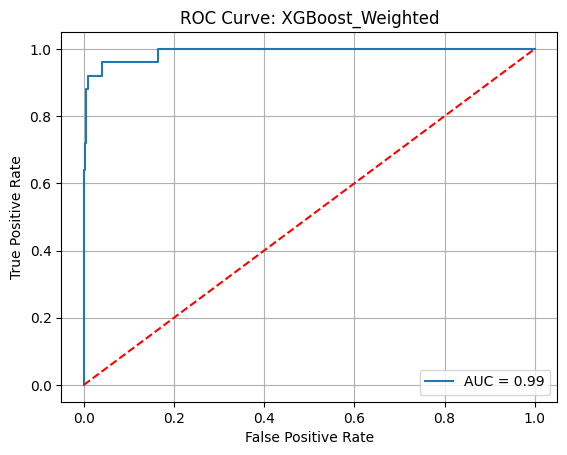

Learning curve saved for XGBoost_Weighted.


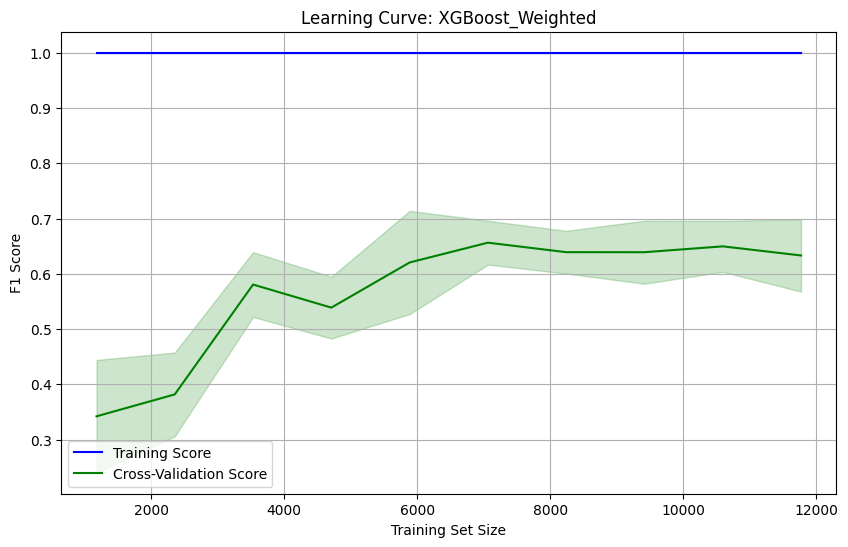

Metrics saved to metrics/xgboost_weighted_metrics.json.
Model saved to models/xgboost_weighted_model.pkl.

Metrics After Addressing Class Imbalance (scale_pos_weight):
{'accuracy': 0.9964673913043478, 'precision': 0.8, 'recall': 0.64, 'f1_score': 0.7111111111111111, 'roc_auc': 0.9903146374829002}


In [59]:
# Preprocessing the data
X_train, X_test, y_train, y_test = preprocess_data(
    df=df, target="y", test_size=0.2, smote=False  # Skipping SMOTE here
)

# Calculating scale_pos_weight for XGBoost
from collections import Counter
counter = Counter(y_train)
scale_pos_weight = counter[0] / counter[1] # Class 0 (majority) & Class 1 (minority)
print(f"Calculated scale_pos_weight: {scale_pos_weight}")

# Initializing and training the XGBoost model
xgb_model_weighted = XGBClassifier(
    random_state=42,
    eval_metric="logloss",
    scale_pos_weight=scale_pos_weight,  # Using scale_pos_weight to address imbalance
    use_label_encoder=False
)

# Train and evaluate the model
xgb_metrics_weighted = train_and_evaluate_model(
    xgb_model_weighted, X_train, X_test, y_train, y_test,
    plot_learning_curve=True,
    model_name="XGBoost_Weighted"
)

# Saving the metrics and model
save_metrics(xgb_metrics_weighted, "metrics/xgboost_weighted_metrics.json")
save_model(xgb_model_weighted, "models/xgboost_weighted_model.pkl")

# Displaying the metrics
print("\nMetrics After Addressing Class Imbalance (scale_pos_weight):")
print(xgb_metrics_weighted)

Using XGBoost with SMOTE for Balancing

Removed datetime features: []

No duplicate rows found.

Applied skewness correction to 36 features.

Outliers handled using IQR Capping method.


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3655
           1       0.74      0.80      0.77        25

    accuracy                           1.00      3680
   macro avg       0.87      0.90      0.88      3680
weighted avg       1.00      1.00      1.00      3680


Confusion Matrix:


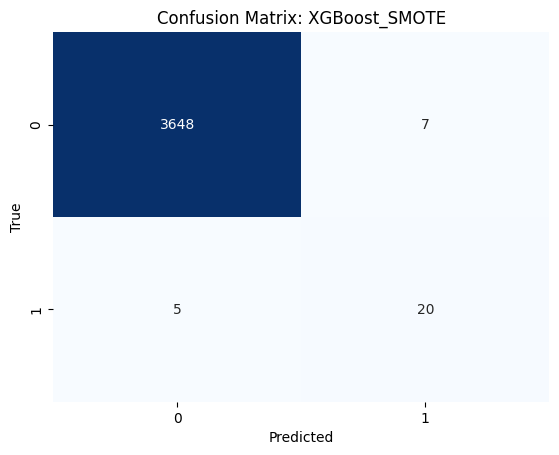

Confusion matrix saved for XGBoost_SMOTE.


<Figure size 640x480 with 0 Axes>

ROC curve saved for XGBoost_SMOTE.


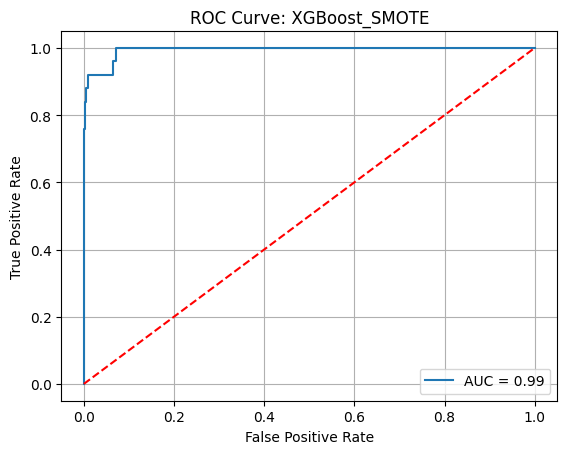

Learning curve saved for XGBoost_SMOTE.


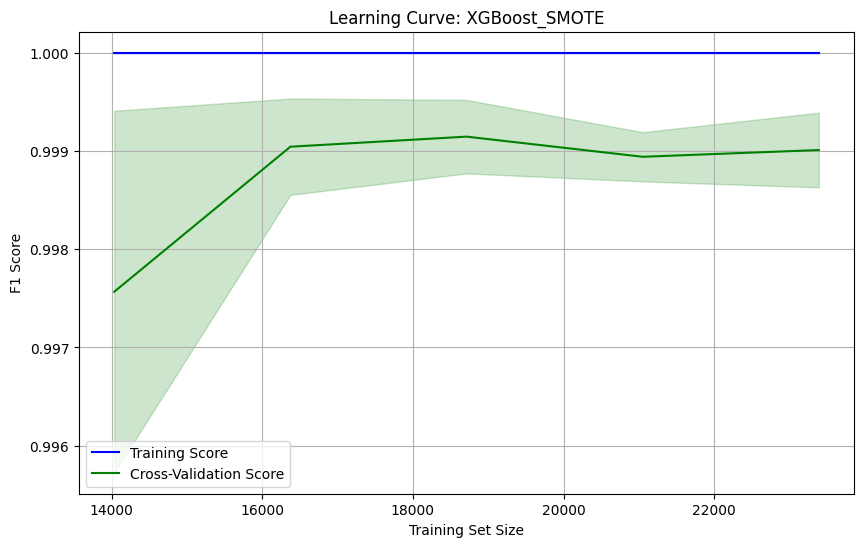

Metrics saved to metrics/xgboost_smote_metrics.json.
Model saved to models/xgboost_smote_model.pkl.

Metrics After Addressing Class Imbalance (SMOTE):
{'accuracy': 0.9967391304347826, 'precision': 0.7407407407407407, 'recall': 0.8, 'f1_score': 0.7692307692307693, 'roc_auc': 0.9935102599179206}


In [60]:
# Preprocessing the data (with SMOTE)
X_train, X_test, y_train, y_test = preprocess_data(
    df=df, target="y", test_size=0.2, smote=True  # Using SMOTE here
)

# Initializing and training the XGBoost model without scale_pos_weight
xgb_model_smote = XGBClassifier(
    random_state=42,
    eval_metric="logloss",
    use_label_encoder=False  # No need for scale_pos_weight since SMOTE is applied
)

# Train and evaluate the model
xgb_metrics_smote = train_and_evaluate_model(
    xgb_model_smote, X_train, X_test, y_train, y_test,
    plot_learning_curve=True,
    model_name="XGBoost_SMOTE"
)

# Saving the metrics and model
save_metrics(xgb_metrics_smote, "metrics/xgboost_smote_metrics.json")
save_model(xgb_model_smote, "models/xgboost_smote_model.pkl")

# Displaying the metrics
print("\nMetrics After Addressing Class Imbalance (SMOTE):")
print(xgb_metrics_smote)

In [73]:
# Preprocess data
X_train, X_test, y_train, y_test = preprocess_data(df, target="y")

# Save preprocessed data for future reference
preprocessed_train = pd.DataFrame(X_train)
preprocessed_test = pd.DataFrame(X_test)
preprocessed_train['target'] = y_train.values
preprocessed_test['target'] = y_test.values

preprocessed_train.to_csv("preprocessed_data/train_data.csv", index=False)
preprocessed_test.to_csv("preprocessed_data/test_data.csv", index=False)

Removed datetime features: []

No duplicate rows found.

Applied skewness correction to 36 features.

Outliers handled using IQR Capping method.



In [75]:
# Creating Tuned XGBoost model

# Updated XGBoost Model with Tuned Parameters
xgb_weighted_tuned = XGBClassifier(
    random_state=42,
    scale_pos_weight=150,  # Adjust for class imbalance
    max_depth=5,           # Reduce depth to avoid overfitting
    learning_rate=0.1,     # Default learning rate
    n_estimators=300,      # Number of boosting rounds
    eval_metric="logloss"  # Evaluation metric
)

In [76]:
# Training the XGBoost model
xgb_weighted_tuned.fit(X_train, y_train)

# Saving the trained model
save_model(xgb_weighted_tuned, "models/xgboost_weighted_tuned_model.pkl")

Model saved to models/xgboost_weighted_tuned_model.pkl.


In [77]:
# Making predictions on the test set
y_pred = xgb_weighted_tuned.predict(X_test)
y_prob = xgb_weighted_tuned.predict_proba(X_test)[:, 1]  # Probabilities for ROC/AUC

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3655
           1       0.58      0.84      0.69        25

    accuracy                           0.99      3680
   macro avg       0.79      0.92      0.84      3680
weighted avg       1.00      0.99      1.00      3680



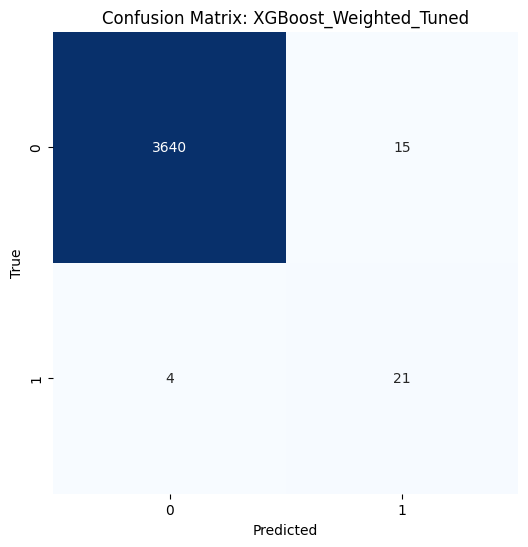

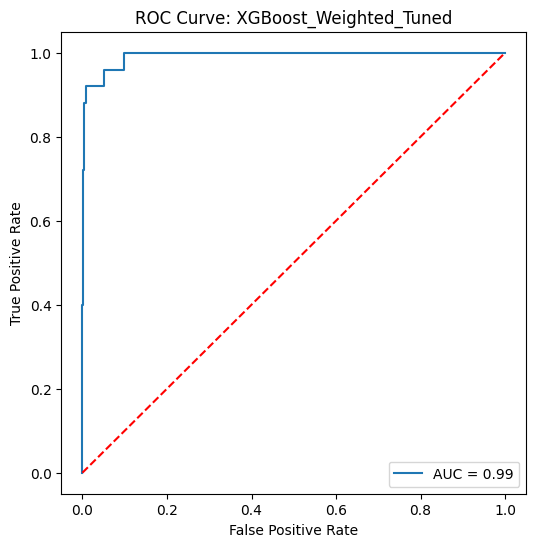

Metrics saved to metrics/xgboost_weighted_tuned_metrics.json.


In [80]:
# Classification report
xgb_classification_report = classification_report(y_test, y_pred, output_dict=True)
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
plt.figure(figsize=(6, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix: XGBoost_Weighted_Tuned")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.savefig("plots/XGBoost_Weighted_Tuned_Confusion_Matrix.png")
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], "r--")
plt.title("ROC Curve: XGBoost_Weighted_Tuned")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.savefig("plots/XGBoost_Weighted_Tuned_ROC_Curve.png")
plt.show()

# Saving metrics
save_metrics(xgb_classification_report, "metrics/xgboost_weighted_tuned_metrics.json")

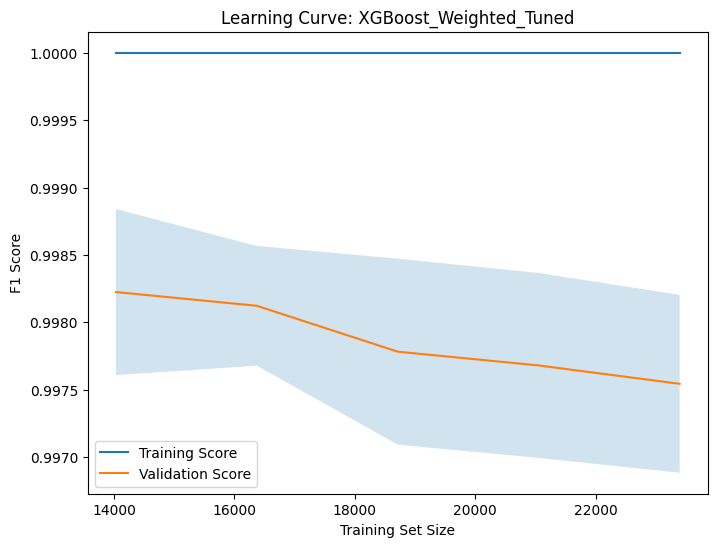

In [81]:
# Generating learning curve data
train_sizes, train_scores, valid_scores = learning_curve(
    xgb_weighted_tuned,
    X_train,
    y_train,
    cv=5,
    scoring="f1",
    train_sizes=np.linspace(0.1, 1.0, 10),
    random_state=42
)

# Plotting the learning curve
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, np.mean(train_scores, axis=1), label="Training Score")
plt.plot(train_sizes, np.mean(valid_scores, axis=1), label="Validation Score")
plt.fill_between(train_sizes, np.mean(valid_scores, axis=1) - np.std(valid_scores, axis=1),
                 np.mean(valid_scores, axis=1) + np.std(valid_scores, axis=1), alpha=0.2)
plt.title("Learning Curve: XGBoost_Weighted_Tuned")
plt.xlabel("Training Set Size")
plt.ylabel("F1 Score")
plt.legend()
plt.savefig("plots/XGBoost_Weighted_Tuned_Learning_Curve.png")
plt.show()

Analysis of the Updated XGBoost Weighted Model

Key Metrics:

-	Precision (Class 1): 0.58
	-	Out of all instances predicted as anomalies, 58% were correct.
	-	Precision for anomalies is moderate, indicating some false positives.
-	Recall (Class 1): 0.84
	-	The model successfully captured 84% of actual anomalies.
	-	High recall suggests the model is good at detecting anomalies but at the cost of some false positives.
-	F1-Score (Class 1): 0.69
	-	The F1-score strikes a balance between precision and recall, and it is reasonable given the class imbalance.
-	Accuracy: 0.99
	-	Overall accuracy is high, driven largely by the correct predictions of the majority class (normal instances).
- Macro Avg:
	-	Precision: 0.79
	-	Recall: 0.92
	-	F1-Score: 0.84
	-	Macro-averaged scores show that the performance on the minority class is influencing the overall model performance significantly.
-	Weighted Avg:
	-	Precision: 1.00
	-	Recall: 0.99
	-	F1-Score: 1.00
	-	Weighted averages reflect the dominance of the majority class (class 0).

Confusion Matrix:

  -	True Negatives (Class 0 correctly predicted): 3640
  -	False Positives (Class 0 predicted as Class 1): 15
	-	15 normal instances were misclassified as anomalies.
	-	False Negatives (Class 1 predicted as Class 0): 4
	-	Only 4 anomalies were missed.
	-	True Positives (Class 1 correctly predicted): 21
	-	The model detected 21 out of 25 anomalies correctly.

ROC Curve and AUC:

 -	AUC (Area Under the Curve): 0.99
-	The model demonstrates excellent discriminative ability, with an AUC close to 1.
	-	The ROC curve highlights the model’s strong performance in distinguishing between normal and anomaly classes.
Learning Curve Insights:

1.	Training Score:
  -	Perfect training score (1.0) indicates overfitting.
2.	Validation Score:
	-	Validation F1-score stabilizes around 0.997, suggesting good generalization but room for improvement.
3.	Variance:
	-	High variance with smaller datasets; stabilizes as the training size increase

Insights:

1.	Strengths:
 -	High recall (84%) for anomalies indicates the model is well-suited for tasks where capturing anomalies is critical.
	-	The precision-recall trade-off is balanced with a reasonable F1-score of 0.69 for the minority class.
	-	The ROC-AUC score of 0.99 reflects the model’s strong ability to separate the two classes.
2.	Weaknesses:
	-	Precision for anomalies (58%) indicates room for improvement in reducing false positives.
	-	While accuracy is high, it is not a reliable metric for imbalanced datasets as it heavily favors the majority class.


###  Voting Classifier

In [83]:
# Defining the baseline models
log_reg_baseline = LogisticRegression(random_state=42)
dt_baseline = DecisionTreeClassifier(random_state=42)
rf_baseline = RandomForestClassifier(random_state=42)

# Updated XGBoost model
xgb_weighted_tuned_model = xgb_weighted_tuned  # Ensure this variable is defined from earlier

# Defining the Voting Classifier
voting_clf = VotingClassifier(
    estimators=[
        ("LogisticRegression", log_reg_baseline),
        ("DecisionTree", dt_baseline),
        ("RandomForest", rf_baseline),
        ("XGBoost", xgb_weighted_tuned_model)
    ],
    voting="soft"  # Using 'soft' voting for probabilistic averaging
)

In [84]:
# Fitting the Voting Classifier
print("\nFitting the Voting Classifier...")
voting_clf.fit(X_train, y_train)


Fitting the Voting Classifier...


VotingClassifier(estimators=[('LogisticRegression',
                              LogisticRegression(random_state=42)),
                             ('DecisionTree',
                              DecisionTreeClassifier(random_state=42)),
                             ('RandomForest',
                              RandomForestClassifier(random_state=42)),
                             ('XGBoost',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,...
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=0.1, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=5,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=300, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=42, ...))],
                 voting='soft')

In [85]:
# Making predictions
y_pred = voting_clf.predict(X_test)

In [86]:
# Evaluating the Voting Classifier
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3655
           1       0.57      0.84      0.68        25

    accuracy                           0.99      3680
   macro avg       0.78      0.92      0.84      3680
weighted avg       1.00      0.99      1.00      3680


Confusion Matrix:
[[3639   16]
 [   4   21]]


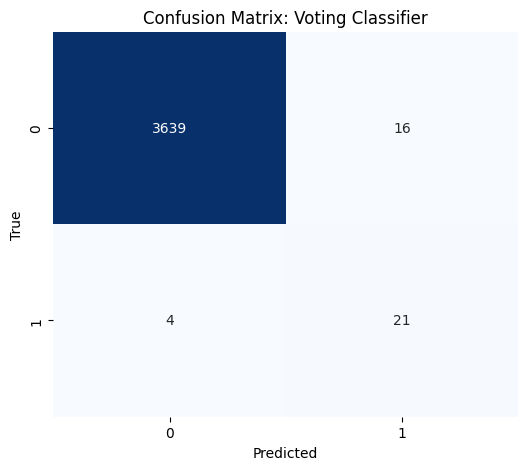


AUC-ROC Score: 0.97


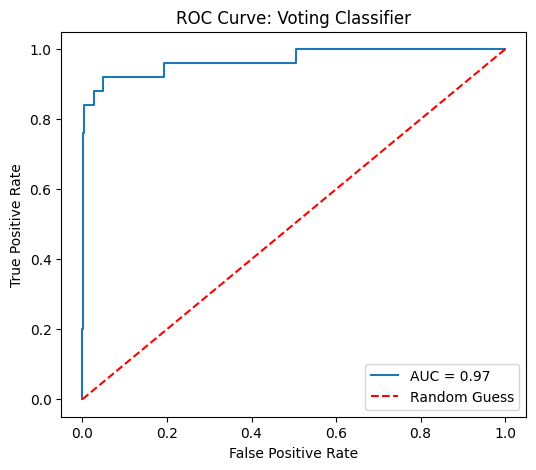

In [87]:
# Visualizing Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title("Confusion Matrix: Voting Classifier")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# If probabilities -> calculate AUC-ROC
y_prob = voting_clf.predict_proba(X_test)[:, 1]  # Probability for the positive class
roc_auc = roc_auc_score(y_test, y_prob)
print(f"\nAUC-ROC Score: {roc_auc:.2f}")

# Plotting the ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], linestyle="--", color="red", label="Random Guess")
plt.title("ROC Curve: Voting Classifier")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.show()


Analysis of the Voting Classifier:

Key Metrics:

-	Precision (Class 1 - Anomalies): 57%
	-	Indicates that out of all predicted anomalies, 57% are actual anomalies.
-	Recall (Class 1 - Anomalies): 84%
	-	Indicates that 84% of actual anomalies are correctly predicted by the model.
-	F1-Score (Class 1 - Anomalies): 68%
	-	A harmonic mean of precision and recall; balances both metrics, highlighting moderate performance on anomalies.
-	Overall Accuracy: 99%
	-	Indicates high performance due to the dominance of the majority class.
-	AUC-ROC Score: 0.97
	-	Excellent distinction between classes, with a very high ability to differentiate between anomalies and normal cases.

Confusion Matrix:

-	True Positives (Anomalies correctly classified): 21
-	True Negatives (Normals correctly classified): 3639	-	False Positives (Normals misclassified as anomalies): 16
-	False Negatives (Anomalies missed): 4

Insights:

1.	Improved Recall:
	-	The voting classifier effectively captures more anomalies compared to individual models.
	-	This indicates better sensitivity towards the minority class (anomalies).
2.	Balanced Performance:
	-	While precision for anomalies is slightly lower, recall is significantly high, resulting in a decent F1-score.
	-	AUC-ROC of 0.97 demonstrates robust class separation.
3.	Error Analysis:
	-	False Negatives: Only 4 anomalies were missed, indicating strong detection capability.
	-	False Positives: 16 normal instances were misclassified as anomalies, a slight trade-off for achieving high recall.
4.	Combining Strengths:
	-	The Voting Classifier aggregates the predictions from baseline models (Logistic Regression, Decision Tree, Random Forest) and the tuned XGBoost model.
	-	The ‘soft’ voting mechanism leverages the probabilities from all models, resulting in a robust overall performance.


In [93]:
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import GridSearchCV

# Defining the base models
log_reg_baseline = LogisticRegression(random_state=42)
dt_baseline = DecisionTreeClassifier(random_state=42)
rf_baseline = RandomForestClassifier(random_state=42)
xgb_best = xgb_weighted_tuned  # Best XGBoost model from previous tuning

# Voting Classifier with soft voting
voting_clf = VotingClassifier(
    estimators=[
        ("LogisticRegression", log_reg_baseline),
        ("DecisionTree", dt_baseline),
        ("RandomForest", rf_baseline),
        ("XGBoost", xgb_best)
    ],
    voting="soft"  # Use probabilities for predictions
)

# Parameter grid for weights
param_grid = {
    "weights": [
        [1, 1, 1, 2],  # Higher weight for XGBoost
        [1, 1, 2, 3],  # More emphasis on Random Forest and XGBoost
        [1, 2, 1, 3],  # Emphasis on Decision Tree and XGBoost
        [2, 1, 1, 3],  # Emphasis on Logistic Regression and XGBoost
        [1, 1, 1, 1],  # Equal weights (baseline configuration)
    ]
}

# GridSearchCV to tune weights
grid_search_voting = GridSearchCV(
    estimator=voting_clf,
    param_grid=param_grid,
    cv=5,  # 5-fold cross-validation
    scoring="f1",  # Optimize for F1-Score
    verbose=2,
    n_jobs=-1
)

# Fitting the GridSearchCV
print("\nTuning Voting Classifier weights...")
grid_search_voting.fit(X_train, y_train)

# Best weights and corresponding score
best_voting_clf = grid_search_voting.best_estimator_
best_weights = grid_search_voting.best_params_["weights"]
best_score = grid_search_voting.best_score_

print(f"\nBest Weights: {best_weights}")
print(f"Best Cross-Validation F1-Score: {best_score:.4f}")

# Evaluating the tuned Voting Classifier on the test set
y_pred = best_voting_clf.predict(X_test)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# probabilities -> calculate AUC-ROC
y_prob = best_voting_clf.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_prob)
print(f"\nAUC-ROC Score: {roc_auc:.2f}")

# Saving the tuned Voting Classifier
save_model(best_voting_clf, "models/voting_classifier_tuned.pkl")
save_metrics({"f1_score": best_score, "roc_auc": roc_auc}, "metrics/voting_classifier_tuned_metrics.json")


Tuning Voting Classifier weights...
Fitting 5 folds for each of 5 candidates, totalling 25 fits

Best Weights: [1, 1, 2, 3]
Best Cross-Validation F1-Score: 0.9984

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3655
           1       0.64      0.84      0.72        25

    accuracy                           1.00      3680
   macro avg       0.82      0.92      0.86      3680
weighted avg       1.00      1.00      1.00      3680


Confusion Matrix:
[[3643   12]
 [   4   21]]

AUC-ROC Score: 0.97
Model saved to models/voting_classifier_tuned.pkl.
Metrics saved to metrics/voting_classifier_tuned_metrics.json.


Analysis of Tuned Voting Classifier:

1.	Best Weights:
 -	After tuning, the best weights assigned to the models are [1, 1, 2, 3].
 -	Logistic Regression: 1
 -	Decision Tree: 1
 -	Random Forest: 2
 - XGBoost: 3
 - 	This indicates that the ensemble is leveraging the strength of the XGBoost model the most, followed by the Random Forest.
	2.	Performance Metrics:
-	Precision:
	-	Class 0 (Normal): 1.00 (Perfect precision)
	-	Class 1 (Anomaly): 0.64
	-	The precision for anomalies (Class 1) is reasonable given the highly imbalanced nature of the dataset.
-	Recall:
	-	Class 0: 1.00
	-	Class 1: 0.84
	-	Recall for anomalies (Class 1) has significantly improved, ensuring most anomalies are detected.
-	F1-Score:
	-	Class 0: 1.00
	-	Class 1: 0.72
	-	The F1-score balances precision and recall for anomalies, showing improvement.
-	Accuracy: 1.00 (99.99%)
	-	The overall accuracy remains extremely high but is less informative for this imbalanced dataset.
-	Macro Avg F1-Score: 0.86
	•	Reflects the model’s balanced performance across both classes.
3.	Confusion Matrix:
	-	True Negatives (Correctly identified Normal cases): 3643
	-	False Positives (Incorrectly identified Anomalies): 12
	-	False Negatives (Missed Anomalies): 4
	-	True Positives (Correctly identified Anomalies): 21
	-	Interpretation:
	-	The model missed 4 anomalies but correctly identified 21, demonstrating improved anomaly detection.
4.	AUC-ROC Score: 0.97
	-	The AUC-ROC score remains excellent, highlighting the model’s ability to discriminate between the classes.

Key Insights:
-	Improved Anomaly Detection:
	- 	With tuned weights, the Voting Classifier strikes a better balance between detecting anomalies and minimizing false positives.
	-	The recall for anomalies increased to 0.84, meaning the model is detecting more anomalies compared to previous versions.
-	Ensemble Advantage:
	-	The Voting Classifier benefits from combining strengths of multiple models, with XGBoost contributing the most to the ensemble.
	-	The weights ensure a good balance between simple models (Logistic Regression, Decision Tree) and complex models (Random Forest, XGBoost).
-	AUC-ROC and Macro Avg:
	-	The high AUC-ROC and Macro Avg F1-Score reflect robust performance across both classes despite the dataset imbalance.
